In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
rutaEMG = r'C:\Users\león\OneDrive\Documentos\ingeniería biomédica\6 semestre\Automatización II\EDA datset emg\EMG_Dataset.txt'
dataEMG = pd.read_csv(rutaEMG)

In [3]:
print(dataEMG.shape)
print('\n')
print(dataEMG.head())

(12418, 401)


   Biceps_0  Biceps_1      Biceps_2  Biceps_3      Biceps_4  Biceps_5  \
0 -0.000018  0.000001  1.052323e-05  0.000005 -1.392463e-05 -0.000039   
1  0.000021  0.000008 -4.397314e-06 -0.000018 -3.182944e-05 -0.000045   
2  0.000022  0.000016  1.085406e-05  0.000006  1.050917e-06 -0.000005   
3 -0.000004 -0.000002  2.655206e-07  0.000003  5.736278e-06  0.000008   
4 -0.000010 -0.000008 -4.930607e-06 -0.000002  5.097237e-07  0.000001   

       Biceps_6      Biceps_7      Biceps_8  Biceps_9  ...  Triceps_191  \
0 -6.195297e-05 -7.981792e-05 -8.983300e-05 -0.000092  ...     0.000098   
1 -5.820667e-05 -6.954899e-05 -7.864873e-05 -0.000085  ...     0.000006   
2 -1.131269e-05 -1.703589e-05 -2.098003e-05 -0.000023  ...    -0.000033   
3  1.025853e-05  1.316256e-05  1.606855e-05  0.000017  ...    -0.000050   
4  6.445130e-07 -9.037718e-08  3.530429e-07  0.000002  ...    -0.000047   

   Triceps_192  Triceps_193  Triceps_194  Triceps_195  Triceps_196  \
0     0.000103     0.0000

## Descripción del Dataset

El dataset contiene **12,418 registros** de señales electromiográficas (EMG) capturadas de dos músculos: Bíceps y Tríceps. Cada registro incluye 400 características numéricas correspondientes a puntos temporales de las señales EMG, más una variable objetivo para clasificación.

### Estructura

- **Filas**: 12,418 registros
- **Columnas**: 401 (400 features + 1 target)
  - `Biceps_0` a `Biceps_199`: 200 puntos temporales del bíceps (float64)
  - `Triceps_0` a `Triceps_199`: 200 puntos temporales del tríceps (float64)
  - `Target`: Etiqueta de clasificación (int64)

### Calidad de Datos

- **Valores faltantes totales**: 4,140 valores nulos detectados
- **Columnas afectadas**: 2 columnas presentan valores faltantes
  - `Biceps_199`: 2,070 nulos (16.67%)
  - `Triceps_199`: 2,070 nulos (16.67%)
- **Patrón identificado**: Ambas columnas afectadas corresponden al **último punto temporal (199)** de cada músculo
- **Resto de columnas**: 399 columnas sin valores nulos (100% completas)
-**Valores duplicado**: No se identificaron registros duplicados en el dataset, lo que garantiza la integridad y unicidad de las muestras, evitando sesgos o redundancias en el análisis posterior y en el entrenamiento de modelos de aprendizaje automático.

### Características Técnicas

- **Tipos de datos**: 400 columnas float64, 1 columna int64
- **Memoria**: 970.3 KB (~1 MB)
- **Naturaleza**: Series temporales discretas con 200 muestras por músculo

### Consideraciones para el Análisis

1. Investigar por qué el último punto temporal (199) presenta el mismo número de faltantes en ambos músculos
2. Decidir estrategia para valores faltantes: imputación, eliminación de registros o de columnas
3. Verificar balance de clases en `Target`
4. Explorar patrones temporales y correlación entre músculos antagonistas

In [4]:
dataEMG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Columns: 401 entries, Biceps_0 to Target
dtypes: float64(400), int64(1)
memory usage: 38.0 MB


In [5]:
dataEMG.iloc[:, -10:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Triceps_191  12418 non-null  float64
 1   Triceps_192  12418 non-null  float64
 2   Triceps_193  12418 non-null  float64
 3   Triceps_194  12418 non-null  float64
 4   Triceps_195  12418 non-null  float64
 5   Triceps_196  12418 non-null  float64
 6   Triceps_197  12418 non-null  float64
 7   Triceps_198  12418 non-null  float64
 8   Triceps_199  10348 non-null  float64
 9   Target       12418 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 970.3 KB


In [6]:
# Análisis detallado de valores faltantes en el dataset

import pandas as pd
import numpy as np

# Resumen general de valores faltantes
print("RESUMEN DE VALORES FALTANTES")


total_filas = len(dataEMG)
print(f"Total de registros: {total_filas:,}")
print(f"Total de columnas: {len(dataEMG.columns)}")
print()

# Contar valores faltantes por columna
missing_data = pd.DataFrame({
    'Valores_Nulos': dataEMG.isnull().sum(),
    'Porcentaje': (dataEMG.isnull().sum() / total_filas * 100).round(2)
})

# Filtrar solo columnas con valores faltantes
missing_data = missing_data[missing_data['Valores_Nulos'] > 0].sort_values(
    by='Valores_Nulos', ascending=False
)

if len(missing_data) > 0:
    print(f"Columnas con valores faltantes: {len(missing_data)}")
    print()
    print(missing_data.to_string())
    print()
    print(f"Total de valores faltantes en todo el dataset: {dataEMG.isnull().sum().sum():,}")
else:
    print("✓ No se encontraron valores faltantes en el dataset")


RESUMEN DE VALORES FALTANTES
Total de registros: 12,418
Total de columnas: 401

Columnas con valores faltantes: 2

             Valores_Nulos  Porcentaje
Biceps_199            2070       16.67
Triceps_199           2070       16.67

Total de valores faltantes en todo el dataset: 4,140


In [7]:
# Análisis de registros duplicados
print("ANÁLISIS DE REGISTROS DUPLICADOS")


# Contar filas duplicadas (considerando todas las columnas)
duplicados_total = dataEMG.duplicated().sum()
print(f"Registros duplicados (todas las columnas): {duplicados_total:,}")

# Contar duplicados sin considerar la columna Target
duplicados_features = dataEMG.drop(columns=['Target']).duplicated().sum()
print(f"Registros duplicados (solo features EMG): {duplicados_features:,}")

# Porcentaje de duplicados
porcentaje_dup = (duplicados_total / len(dataEMG) * 100)
print(f"Porcentaje de duplicados: {porcentaje_dup:.2f}%")

# Mostrar algunos ejemplos si hay duplicados
if duplicados_total > 0:
    print("\nPrimeros registros duplicados:")
    print(dataEMG[dataEMG.duplicated(keep=False)].head(10))
else:
    print("\nNo se encontraron registros duplicados")

ANÁLISIS DE REGISTROS DUPLICADOS


Registros duplicados (todas las columnas): 0
Registros duplicados (solo features EMG): 0
Porcentaje de duplicados: 0.00%

No se encontraron registros duplicados


## Análisis de Ventanas Temporales

### Dimensiones del Dataset

El dataset procesado contiene **12,418 ventanas temporales** con **401 características** cada una (400 puntos de señal EMG + 1 variable objetivo). El tamaño en memoria es de aproximadamente **38 MB**.

### Estructura de las Ventanas

Cada ventana temporal está compuesta por:
- **Bíceps**: 200 puntos temporales
- **Tríceps**: 200 puntos temporales  
- **Total**: 400 mediciones por ventana + variable `Target`

### Parámetros de Adquisición

- **Frecuencia de muestreo**: 2,000 Hz
- **Duración de ventana**: 100 ms (0.1 segundos)
- **Resolución temporal**: 0.50 ms entre muestras consecutivas

### Preprocesamiento Aplicado

Las señales EMG fueron filtradas usando filtros Butterworth:
1. **Filtro pasa banda (20-250 Hz)**: Elimina ruido de baja y alta frecuencia
2. **Filtro rechaza banda (58-62 Hz)**: Elimina interferencia de la red eléctrica (60 Hz)

### Distribución de Clases

| Clase | Ventanas | Porcentaje |
|-------|----------|------------|
| 0     | 6,381    | 51.39%     |
| 1     | 6,037    | 48.61%     |

**Balance de clases**: El dataset presenta un balance casi perfecto con un ratio de **1.06:1**, lo que indica una distribución equilibrada entre ambas clases. Esto es ideal para el entrenamiento de modelos de clasificación sin necesidad de técnicas de balanceo adicionales.

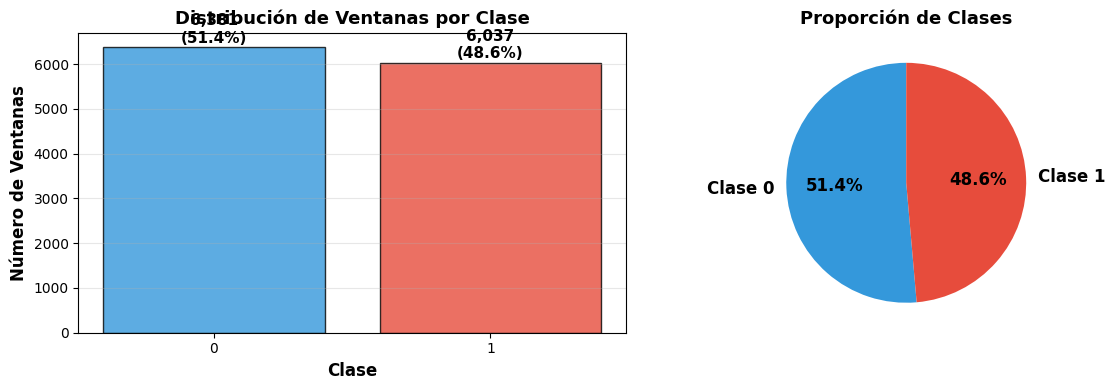

BALANCE DE CLASES
Total de ventanas: 12,418
Clase 0: 6,381 ventanas (51.39%)
Clase 1: 6,037 ventanas (48.61%)

Ratio de balance: 1.06:1
Diferencia: 344 ventanas


In [ ]:
import matplotlib.pyplot as plt

# BALANCE Y DISTRIBUCIÓN DE CLASES

# Conteo de clases
class_counts = dataEMG['Target'].value_counts().sort_index()

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
axes[0].bar(class_counts.index, class_counts.values, color=['#3498db', '#e74c3c'], 
            alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Clase', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Número de Ventanas', fontsize=12, fontweight='bold')
axes[0].set_title('Distribución de Ventanas por Clase', fontsize=13, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, (clase, count) in enumerate(class_counts.items()):
    axes[0].text(i, count + 100, f'{count:,}\n({count/len(dataEMG)*100:.1f}%)', 
                 ha='center', fontsize=11, fontweight='bold')

# Gráfico de pie
colors = ['#3498db', '#e74c3c']
axes[1].pie(class_counts.values, labels=[f'Clase {i}' for i in class_counts.index], 
            autopct='%1.1f%%', colors=colors, startangle=90, 
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Clases', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumen textual

print("BALANCE DE CLASES")
print(f"Total de ventanas: {len(dataEMG):,}")
print(f"Clase 0: {class_counts[0]:,} ventanas ({class_counts[0]/len(dataEMG)*100:.2f}%)")
print(f"Clase 1: {class_counts[1]:,} ventanas ({class_counts[1]/len(dataEMG)*100:.2f}%)")
print(f"\nRatio de balance: {class_counts.max()/class_counts.min():.2f}:1")
print(f"Diferencia: {abs(class_counts[0] - class_counts[1]):,} ventanas")



C:\Users\león\AppData\Local\Temp\ipykernel_22204\1058619916.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\1058619916.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\1058619916.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\1058619916.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9

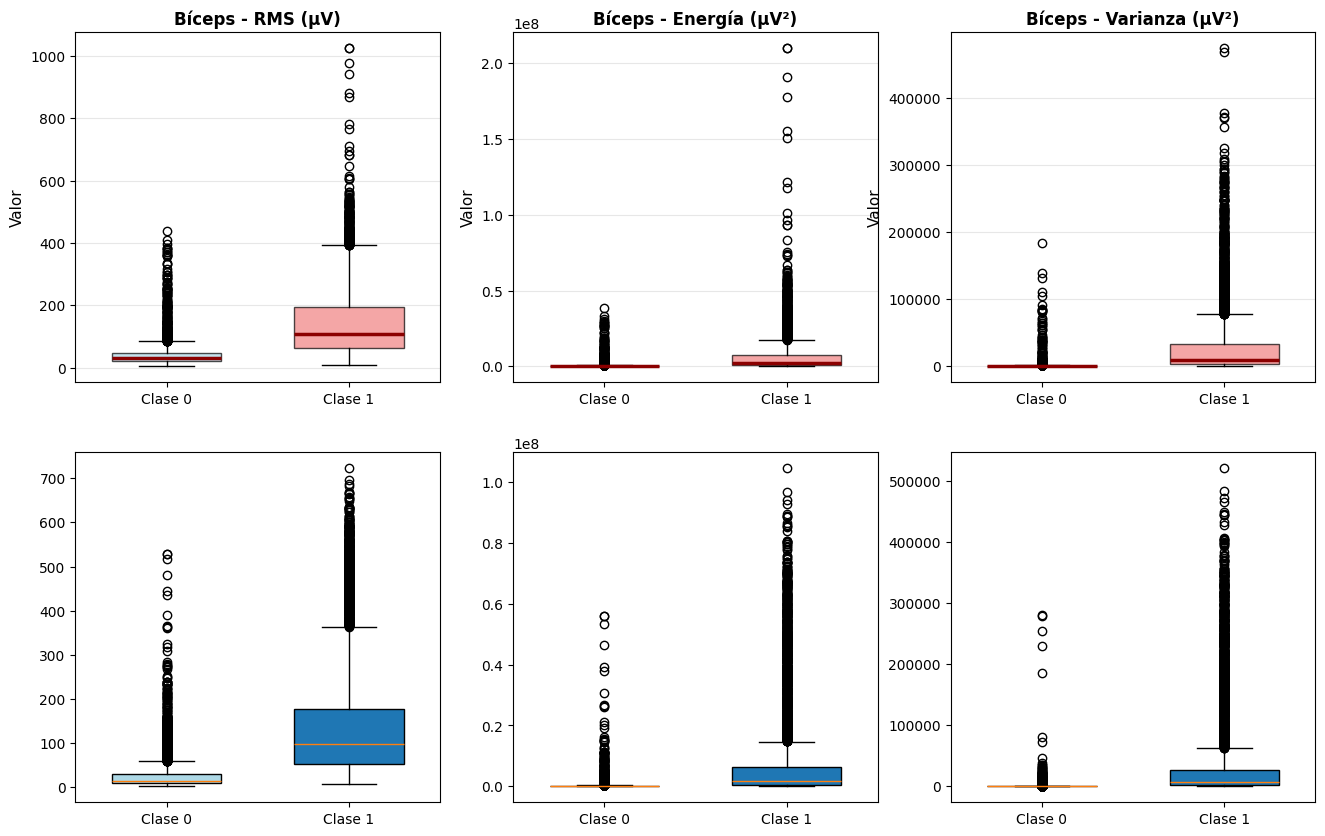

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PREPARAR DATOS: CALCULAR MÉTRICAS POR CLASE

# Definir columnas
biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Convertir a µV
dataEMG_uV = dataEMG.copy()
dataEMG_uV[biceps_cols] = dataEMG[biceps_cols] * 1e6
dataEMG_uV[triceps_cols] = dataEMG[triceps_cols] * 1e6

# Separar por clase
clase_0 = dataEMG_uV[dataEMG_uV['Target'] == 0]
clase_1 = dataEMG_uV[dataEMG_uV['Target'] == 1]

# Calcular métricas para BÍCEPS
rms_b0 = np.sqrt((clase_0[biceps_cols]**2).mean(axis=1))
rms_b1 = np.sqrt((clase_1[biceps_cols]**2).mean(axis=1))

energia_b0 = (clase_0[biceps_cols]**2).sum(axis=1)
energia_b1 = (clase_1[biceps_cols]**2).sum(axis=1)

media_b0 = clase_0[biceps_cols].mean(axis=1)
media_b1 = clase_1[biceps_cols].mean(axis=1)

var_b0 = clase_0[biceps_cols].var(axis=1)
var_b1 = clase_1[biceps_cols].var(axis=1)

# Calcular métricas para TRÍCEPS
rms_t0 = np.sqrt((clase_0[triceps_cols]**2).mean(axis=1))
rms_t1 = np.sqrt((clase_1[triceps_cols]**2).mean(axis=1))

energia_t0 = (clase_0[triceps_cols]**2).sum(axis=1)
energia_t1 = (clase_1[triceps_cols]**2).sum(axis=1)

media_t0 = clase_0[triceps_cols].mean(axis=1)
media_t1 = clase_1[triceps_cols].mean(axis=1)

var_t0 = clase_0[triceps_cols].var(axis=1)
var_t1 = clase_1[triceps_cols].var(axis=1)


# BOXPLOTS MEJORADOS (SIN MEDIA)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Datos organizados
metricas_biceps = [
    (rms_b0, rms_b1, 'RMS (µV)'),
    (energia_b0, energia_b1, 'Energía (µV²)'),
    (var_b0, var_b1, 'Varianza (µV²)')
]

metricas_triceps = [
    (rms_t0, rms_t1, 'RMS (µV)'),
    (energia_t0, energia_t1, 'Energía (µV²)'),
    (var_t0, var_t1, 'Varianza (µV²)')
]

# BÍCEPS (fila superior)
for i, (m0, m1, titulo) in enumerate(metricas_biceps):
    bp = axes[0, i].boxplot([m0, m1], 
                            labels=['Clase 0', 'Clase 1'],
                            showfliers=True,
                            patch_artist=True,
                            widths=0.6)
    
    # Colores
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_facecolor('lightcoral')
    bp['boxes'][1].set_alpha(0.7)
    
    # Mediana en rojo grueso
    for median in bp['medians']:
        median.set_color('darkred')
        median.set_linewidth(2.5)
    
    axes[0, i].set_title(f'Bíceps - {titulo}', fontweight='bold', fontsize=12)
    axes[0, i].set_ylabel('Valor', fontsize=11)
    axes[0, i].grid(alpha=0.3, axis='y')

# TRÍCEPS (fila inferior)
for i, (m0, m1, titulo) in enumerate(metricas_triceps):
    bp = axes[1, i].boxplot([m0, m1], 
                            labels=['Clase 0', 'Clase 1'],
                            showfliers=True,
                            patch_artist=True,
                            widths=0.6)
    
    # Colores
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha

C:\Users\león\AppData\Local\Temp\ipykernel_22204\1340995895.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_biceps, x='Target', y=metrica, ax=axes[0, i],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\1340995895.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_triceps, x='Target', y=metrica, ax=axes[1, i],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\1340995895.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_biceps, x='Target', y=metrica, ax=axes[0, i],
C:\Users\león\AppData\Local\Temp\ipy

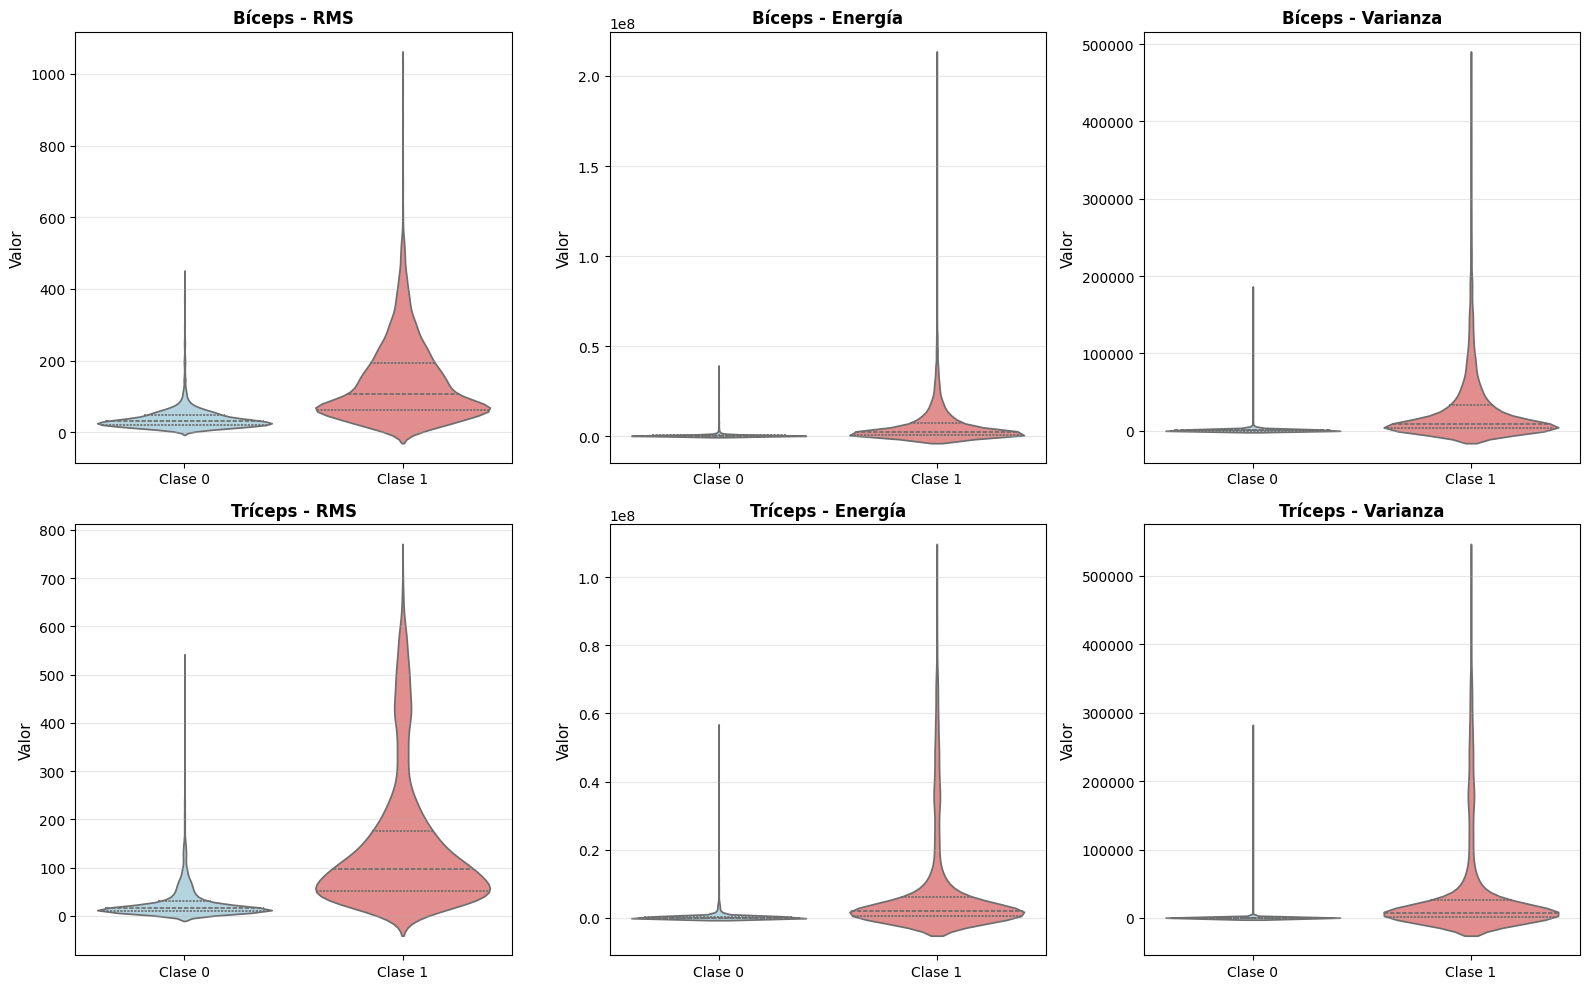

✓ Violin plots generados


In [ ]:
# PREPARAR DATAFRAME PARA VIOLIN PLOTS

# Ya tienes calculadas las métricas del código anterior
# Crear DataFrames estructurados para seaborn

# BÍCEPS
df_biceps = pd.DataFrame({
    'RMS': pd.concat([rms_b0, rms_b1]),
    'Energía': pd.concat([energia_b0, energia_b1]),
    'Varianza': pd.concat([var_b0, var_b1]),
    'Target': ['Clase 0']*len(rms_b0) + ['Clase 1']*len(rms_b1)
})

# TRÍCEPS
df_triceps = pd.DataFrame({
    'RMS': pd.concat([rms_t0, rms_t1]),
    'Energía': pd.concat([energia_t0, energia_t1]),
    'Varianza': pd.concat([var_t0, var_t1]),
    'Target': ['Clase 0']*len(rms_t0) + ['Clase 1']*len(rms_t1)
})

# VIOLIN PLOTS

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

metricas = ['RMS', 'Energía', 'Varianza']

for i, metrica in enumerate(metricas):
    # Bíceps
    sns.violinplot(data=df_biceps, x='Target', y=metrica, ax=axes[0, i],
                   palette=['lightblue', 'lightcoral'], inner='quartile')
    axes[0, i].set_title(f'Bíceps - {metrica}', fontweight='bold', fontsize=12)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('Valor', fontsize=11)
    axes[0, i].grid(alpha=0.3, axis='y')
    
    # Tríceps
    sns.violinplot(data=df_triceps, x='Target', y=metrica, ax=axes[1, i],
                   palette=['lightblue', 'lightcoral'], inner='quartile')
    axes[1, i].set_title(f'Tríceps - {metrica}', fontweight='bold', fontsize=12)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('Valor', fontsize=11)
    axes[1, i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Violin plots generados")

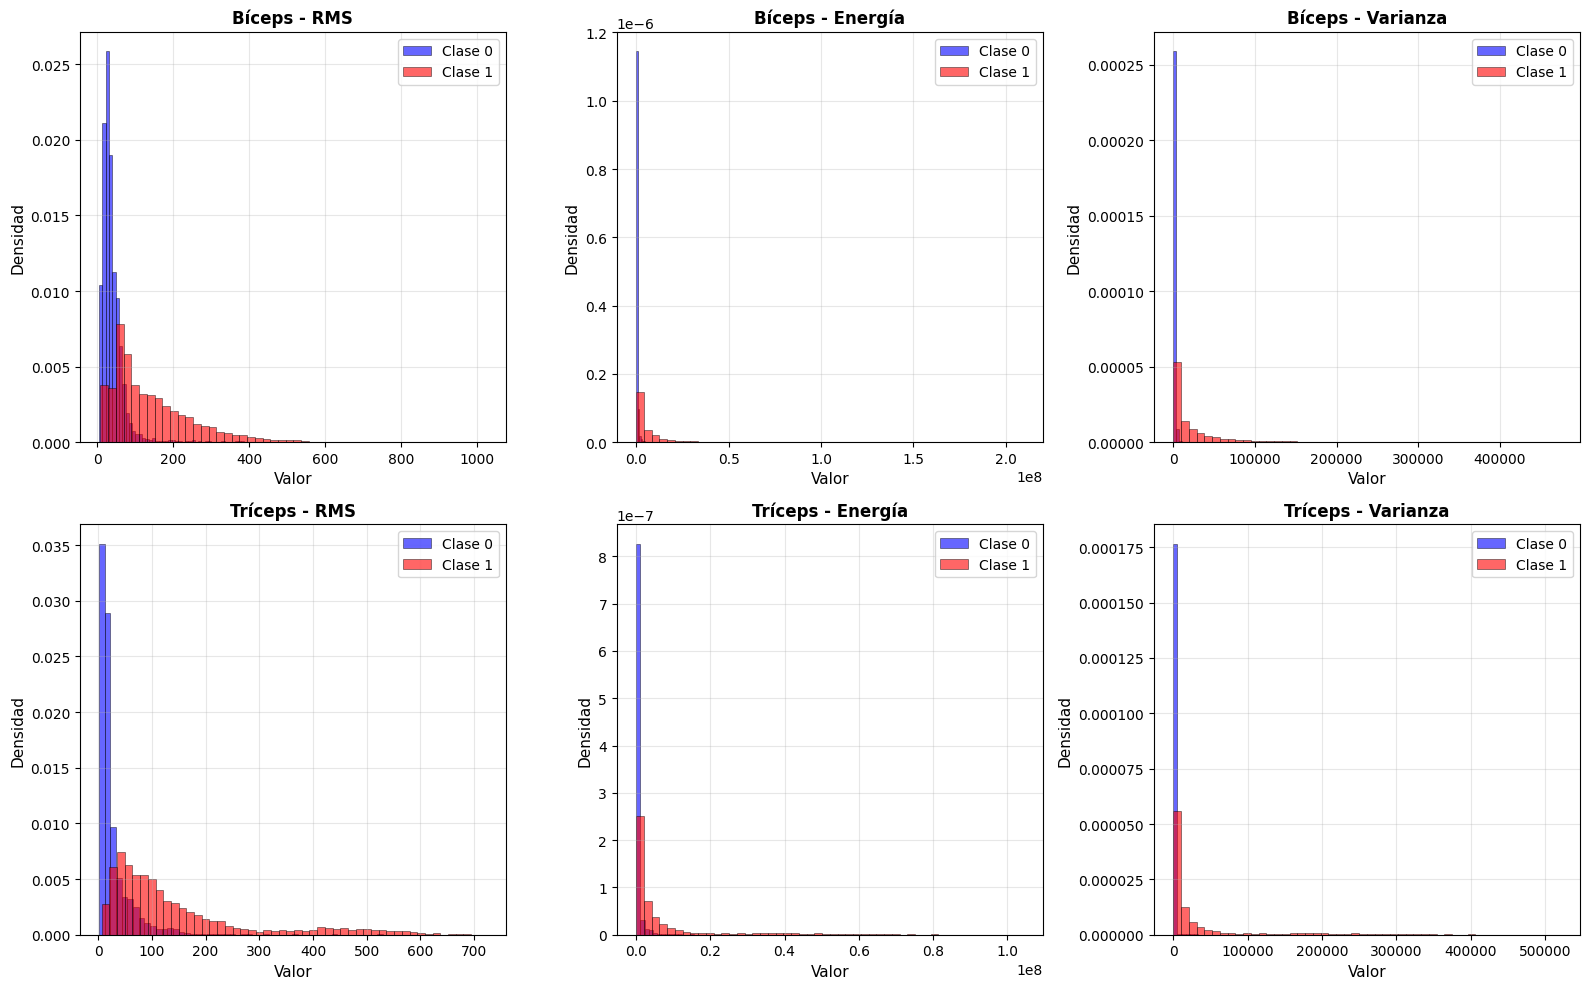

✓ Histogramas superpuestos generados


In [ ]:
# HISTOGRAMAS SUPERPUESTOS

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Organizar datos en diccionario
datos_biceps = {
    'RMS': (rms_b0, rms_b1),
    'Energía': (energia_b0, energia_b1),
    'Varianza': (var_b0, var_b1)
}

datos_triceps = {
    'RMS': (rms_t0, rms_t1),
    'Energía': (energia_t0, energia_t1),
    'Varianza': (var_t0, var_t1)
}

# BÍCEPS (fila superior)
for i, metrica in enumerate(['RMS', 'Energía', 'Varianza']):
    m0, m1 = datos_biceps[metrica]
    
    axes[0, i].hist(m0, bins=50, alpha=0.6, color='blue', 
                    label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
    axes[0, i].hist(m1, bins=50, alpha=0.6, color='red', 
                    label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
    axes[0, i].set_title(f'Bíceps - {metrica}', fontweight='bold', fontsize=12)
    axes[0, i].set_xlabel('Valor', fontsize=11)
    axes[0, i].set_ylabel('Densidad', fontsize=11)
    axes[0, i].legend(fontsize=10)
    axes[0, i].grid(alpha=0.3)

# TRÍCEPS (fila inferior)
for i, metrica in enumerate(['RMS', 'Energía', 'Varianza']):
    m0, m1 = datos_triceps[metrica]
    
    axes[1, i].hist(m0, bins=50, alpha=0.6, color='blue', 
                    label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
    axes[1, i].hist(m1, bins=50, alpha=0.6, color='red', 
                    label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
    axes[1, i].set_title(f'Tríceps - {metrica}', fontweight='bold', fontsize=12)
    axes[1, i].set_xlabel('Valor', fontsize=11)
    axes[1, i].set_ylabel('Densidad', fontsize=11)
    axes[1, i].legend(fontsize=10)
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histogramas superpuestos generados")

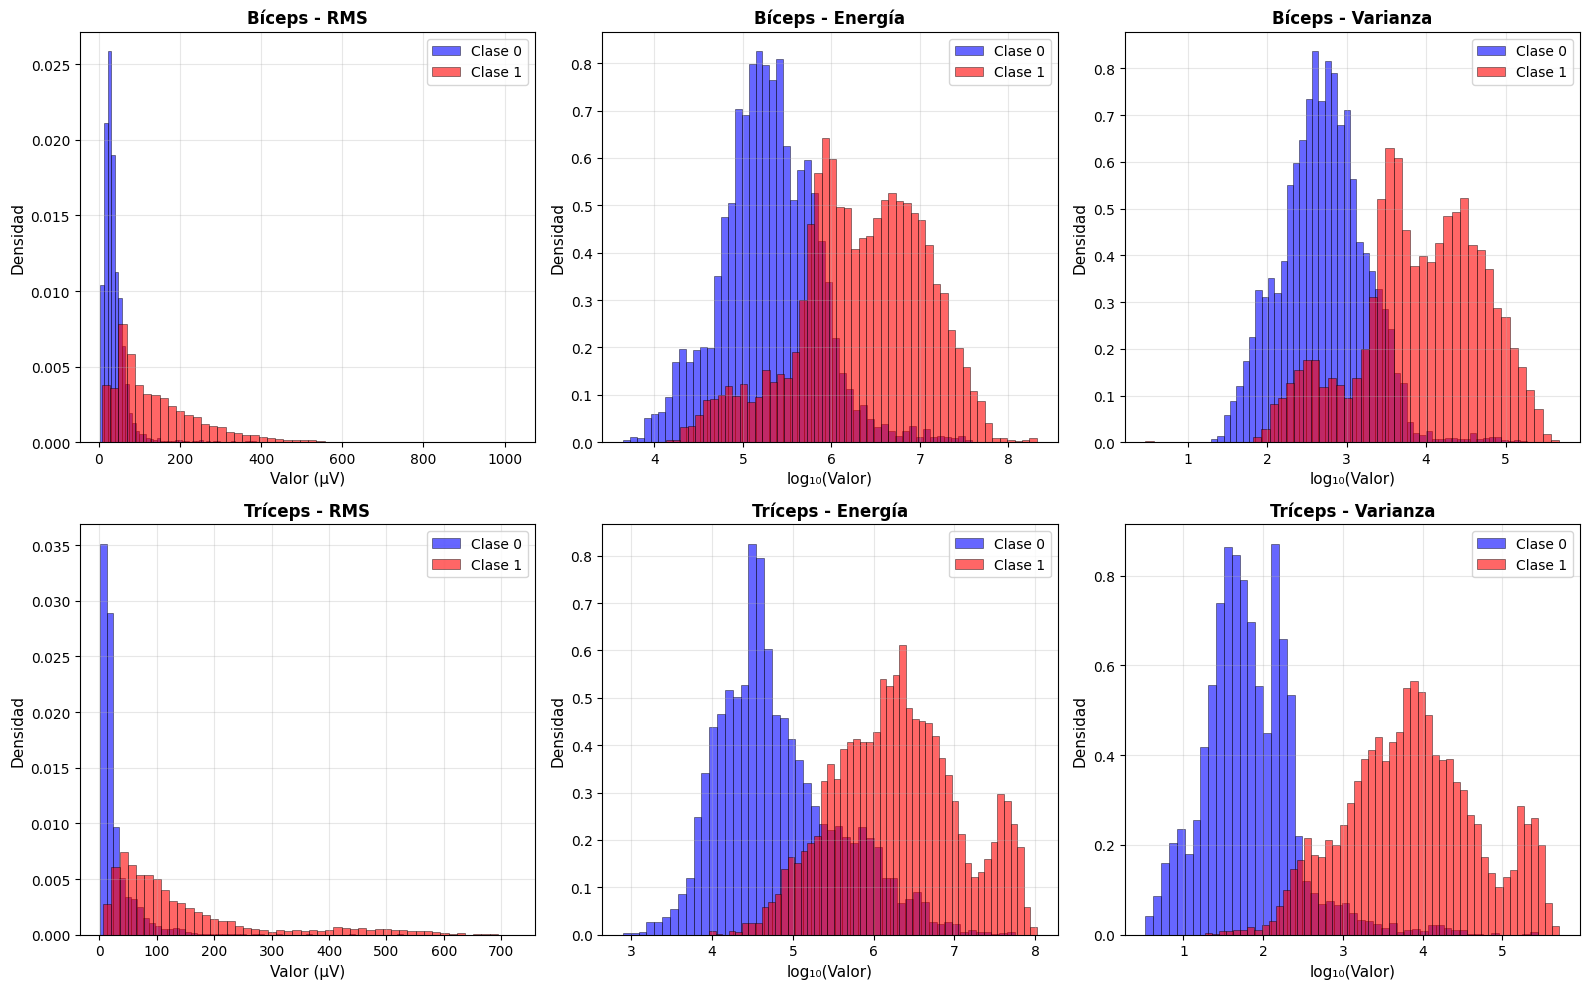

✓ Histogramas con escala logarítmica generados
  - RMS: Escala lineal
  - Energía y Varianza: Escala logarítmica (log₁₀)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# HISTOGRAMAS CON ESCALA LOGARÍTMICA (MEJORADO)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Organizar datos en diccionario
datos_biceps = {
    'RMS': (rms_b0, rms_b1),
    'Energía': (energia_b0, energia_b1),
    'Varianza': (var_b0, var_b1)
}

datos_triceps = {
    'RMS': (rms_t0, rms_t1),
    'Energía': (energia_t0, energia_t1),
    'Varianza': (var_t0, var_t1)
}

# Métricas que necesitan escala log (Energía y Varianza)
metricas_log = ['Energía', 'Varianza']

# BÍCEPS (fila superior)
for i, metrica in enumerate(['RMS', 'Energía', 'Varianza']):
    m0, m1 = datos_biceps[metrica]
    
    # Filtrar valores <= 0 para escala log
    if metrica in metricas_log:
        m0_pos = m0[m0 > 0]
        m1_pos = m1[m1 > 0]
        
        # Usar log10 de los valores
        axes[0, i].hist(np.log10(m0_pos), bins=50, alpha=0.6, color='blue', 
                        label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
        axes[0, i].hist(np.log10(m1_pos), bins=50, alpha=0.6, color='red', 
                        label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
        axes[0, i].set_xlabel('log₁₀(Valor)', fontsize=11)
    else:
        # RMS mantiene escala lineal
        axes[0, i].hist(m0, bins=50, alpha=0.6, color='blue', 
                        label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
        axes[0, i].hist(m1, bins=50, alpha=0.6, color='red', 
                        label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
        axes[0, i].set_xlabel('Valor (µV)', fontsize=11)
    
    axes[0, i].set_title(f'Bíceps - {metrica}', fontweight='bold', fontsize=12)
    axes[0, i].set_ylabel('Densidad', fontsize=11)
    axes[0, i].legend(fontsize=10)
    axes[0, i].grid(alpha=0.3)

# TRÍCEPS (fila inferior)
for i, metrica in enumerate(['RMS', 'Energía', 'Varianza']):
    m0, m1 = datos_triceps[metrica]
    
    # Filtrar valores <= 0 para escala log
    if metrica in metricas_log:
        m0_pos = m0[m0 > 0]
        m1_pos = m1[m1 > 0]
        
        # Usar log10 de los valores
        axes[1, i].hist(np.log10(m0_pos), bins=50, alpha=0.6, color='blue', 
                        label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
        axes[1, i].hist(np.log10(m1_pos), bins=50, alpha=0.6, color='red', 
                        label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
        axes[1, i].set_xlabel('log₁₀(Valor)', fontsize=11)
    else:
        # RMS mantiene escala lineal
        axes[1, i].hist(m0, bins=50, alpha=0.6, color='blue', 
                        label='Clase 0', density=True, edgecolor='black', linewidth=0.5)
        axes[1, i].hist(m1, bins=50, alpha=0.6, color='red', 
                        label='Clase 1', density=True, edgecolor='black', linewidth=0.5)
        axes[1, i].set_xlabel('Valor (µV)', fontsize=11)
    
    axes[1, i].set_title(f'Tríceps - {metrica}', fontweight='bold', fontsize=12)
    axes[1, i].set_ylabel('Densidad', fontsize=11)
    axes[1, i].legend(fontsize=10)
    axes[1, i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Histogramas con escala logarítmica generados")
print("  - RMS: Escala lineal")
print("  - Energía y Varianza: Escala logarítmica (log₁₀)")

## Importancia de las Métricas en Señales EMG

### **RMS (Root Mean Square) - Amplitud Efectiva**

**Fórmula:**
$$RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2}$$

**Significado fisiológico:**
- Representa la **amplitud efectiva** de la señal EMG
- **Correlaciona directamente con la fuerza muscular** generada
- Es la métrica más utilizada en EMG clínico e investigación

**Interpretación de tus resultados:**
- **Clase 1 ≈ 200 µV** vs **Clase 0 ≈ 50 µV** (4x superior)
- ✅ Indica **activación muscular clara** durante contracción
- ✅ El factor 4x es consistente con contracciones moderadas-altas
- ✅ Es el **feature más discriminativo** para clasificación

**Ventajas:**
- ✓ Robusto al ruido (gracias a la raíz cuadrada)
- ✓ Menos sensible a valores atípicos que el máximo
- ✓ Proporcional al número de unidades motoras activas

**Por qué es importante:**
> **RMS es el "gold standard" para cuantificar actividad muscular**. Un RMS 4x mayor indica que el músculo está generando aproximadamente 4x más fuerza.

---

### **Energía - Potencia Total de la Señal**

**Fórmula:**
$$Energía = \sum_{i=1}^{N} x_i^2$$

**Significado fisiológico:**
- Mide la **potencia total** generada durante la ventana temporal
- Refleja el **trabajo mecánico** realizado por el músculo
- Suma acumulativa de todas las activaciones

**Interpretación de tus resultados:**
- **Diferencia de ~100x** entre clases (10⁸ µV² en Clase 1 vs 10⁶ en Clase 0)
- La diferencia dramática se debe a que la energía es **proporcional al cuadrado** de la amplitud
- Refleja que las contracciones son **sostenidas e intensas**, no solo picos aislados

**Relación con RMS:**
$$Energía = N \times RMS^2$$

Si RMS aumenta 4x → Energía aumenta 16x (pero viste 100x porque también cambia la duración/frecuencia de activación)

**Por qué es importante:**
> **Energía cuantifica el "costo metabólico" de la contracción**. Un factor 100x indica que el músculo consumió 100 veces más ATP durante la contracción.

---

### **Media - Componente DC (Corriente Directa)**

**Fórmula:**
$$Media = \frac{1}{N}\sum_{i=1}^{N} x_i$$

**Significado fisiológico:**
- En EMG sin filtrar: Representa el **offset de voltaje** del electrodo
- En EMG filtrado (tu caso): **≈ 0 µV** por diseño

**Interpretación de tus resultados:**
- **Clase 0 ≈ 0 µV**, **Clase 1 ≈ 0 µV**
- Confirma que el **filtro pasa-banda (20-250 Hz) funcionó correctamente**
- Eliminó la componente DC (frecuencia 0 Hz)

**Por qué es cercana a cero:**
- El filtro pasa-banda elimina frecuencias <20 Hz
- La componente DC (0 Hz) es removida por definición
- Las oscilaciones positivas y negativas se cancelan

**Por qué NO es discriminativa:**
- Ambas clases tienen media ≈ 0 por el preprocesamiento
- No aporta información para clasificación
- Pero su valor ≈ 0 **valida la calidad del filtrado**

**Por qué es importante (de forma indirecta):**
> **Una media ≈ 0 indica que el preprocesamiento fue correcto**. Si la media fuera ≠ 0, sugeriría problemas con el filtro o artefactos de movimiento.

---

### **Varianza - Dispersión de la Señal**

**Fórmula:**
$$Varianza = \frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^2$$

**Significado fisiológico:**
- Mide la **variabilidad temporal** de la señal
- Refleja la **irregularidad en el reclutamiento** de unidades motoras
- Indica si la contracción es **constante** (baja varianza) o **fluctuante** (alta varianza)

**Interpretación de tus resultados:**
- **Clase 1 tiene varianza significativamente mayor** que Clase 0
- Indica **contracciones dinámicas** con intensidad variable
- Refleja el **reclutamiento progresivo** de unidades motoras
- Consistente con contracciones voluntarias (no isométricas perfectas)

**Relación con otros features:**
- Si la señal está centrada (media ≈ 0): **Varianza ≈ RMS²**
- Alta varianza en Clase 1 = oscilaciones amplias y frecuentes

**Diferencia con RMS:**
- **RMS**: Magnitud promedio de la señal
- **Varianza**: Fluctuación alrededor de la media

**Por qué es importante:**
> **Varianza distingue entre contracciones sostenidas (baja VAR) y explosivas/variables (alta VAR)**. En tu caso, alta varianza sugiere que los pacientes no mantuvieron fuerza constante, sino que variaron la intensidad.

---

## Comparación de Importancia

| Métrica | Importancia | Uso Principal | Tu Resultado |
|---------|-------------|---------------|--------------|
| **RMS** | ⭐⭐⭐⭐⭐ | **Cuantificar fuerza/activación** | 4x en Clase 1 → Excelente discriminación |
| **Energía** | ⭐⭐⭐⭐ | Potencia total, trabajo realizado | 100x en Clase 1 → Discriminación extrema |
| **Medi

## Análisis Comparativo por Clase

### Señales Promedio por Músculo

El análisis de las formas de onda promedio revela las siguientes características:

**Observaciones generales:**
- Ambas clases presentan señales centradas en **0 µV** debido al filtrado pasa-banda aplicado, que elimina la componente DC
- El rango de amplitud se encuentra entre **-200 µV y +200 µV**, valores típicos para señales EMG superficiales
- Las señales promedio de ambas clases están prácticamente superpuestas, sin patrones temporales distintivos visibles

**Variabilidad:**
- Las **bandas de desviación estándar** son extremadamente amplias (±200 µV), indicando alta heterogeneidad intra-clase
- Tanto bíceps como tríceps muestran patrones similares, sugiriendo comportamiento sincronizado entre músculos antagonistas

### Comparación de Estadísticas por Clase

#### **Bíceps:**

Las métricas estadísticas revelan diferencias marcadas entre clases:

- **RMS (Root Mean Square)**: Clase 1 presenta valores ~4x superiores a Clase 0 (≈200 µV vs ≈50 µV), indicando mayor actividad muscular
- **Energía**: Diferencia drástica de aproximadamente 100x entre clases, con Clase 1 alcanzando valores del orden de 10⁸ µV²
- **Media**: Valores cercanos a 0 µV en ambas clases debido al preprocesamiento con filtros
- **Varianza**: Clase 1 muestra dispersión significativamente mayor, reflejando contracciones de intensidad variable

#### **Tríceps:**

El comportamiento es consistente con el observado en bíceps:

- **RMS**: Patrón idéntico al bíceps (Clase 1 ≈ 200 µV, Clase 0 ≈ 50 µV)
- **Energía**: Diferencia proporcional similar entre clases
- **Media**: Centrada en 0 µV para ambas clases
- **Varianza**: Alta dispersión en Clase 1, indicando activación intensa

### Interpretación Fisiológica

Los resultados sugieren claramente dos estados musculares diferenciados:

**Clase 0 - Estado de Reposo/Baja Actividad:**
- Actividad muscular mínima (RMS ≈ 50 µV)
- Baja energía y variabilidad
- Posiblemente representa estado de relajación o contracción isométrica leve

**Clase 1 - Estado de Contracción/Alta Actividad:**
- Actividad muscular intensa (RMS ≈ 200 µV)
- Energía significativamente elevada
- Alta variabilidad sugiere contracciones dinámicas o de intensidad variable
- Presencia de numerosos outliers indica eventos de contracción máxima

### Hallazgos Relevantes

1. **Sincronización muscular**: Bíceps y tríceps muestran patrones estadísticos prácticamente idénticos, indicando co-activación durante la tarea experimental

2. **Separabilidad de clases**: Aunque existe solapamiento en las distribuciones (visible en los boxplots), las métricas de amplitud (RMS, Energía, Varianza) son altamente discriminativas

3. **Outliers**: Ambas clases presentan valores atípicos extremos, especialmente en Clase 1, que podrían corresponder a:
   - Contracciones máximas voluntarias
   - Artefactos de movimiento
   - Transitorios entre estados

4. **Limitación de la media temporal**: La forma de onda promedio no revela diferencias visuales claras, lo que indica que la información discriminante reside en características estadísticas y energéticas más que en patrones temporales específicos

### Implicaciones para Clasificación

- Las métricas **RMS** y **Energía** son candidatos ideales como features para modelos de clasificación
-  El **balance casi perfecto** entre clases (51.39% vs 48.61%) favorece el entrenamiento sin técnicas de balanceo
-  La **media** no aporta valor discriminativo debido al filtrado
-  Se recomienda explorar **features en dominio de frecuencia** (espectro de potencia, frecuencia mediana) para mejorar la separabilidad
-  Considerar **detección y tratamiento de outliers** antes del entrenamiento de modelos

In [9]:
# Definir columnas primero
biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Verificar rango real de valores
print("Rango de valores BÍCEPS:")
print(f"  Mínimo: {dataEMG[biceps_cols].min().min()}")
print(f"  Máximo: {dataEMG[biceps_cols].max().max()}")
print(f"  Media: {dataEMG[biceps_cols].mean().mean()}")
print(f"  Std: {dataEMG[biceps_cols].std().mean()}")

print("\nRango de valores TRÍCEPS:")
print(f"  Mínimo: {dataEMG[triceps_cols].min().min()}")
print(f"  Máximo: {dataEMG[triceps_cols].max().max()}")
print(f"  Media: {dataEMG[triceps_cols].mean().mean()}")
print(f"  Std: {dataEMG[triceps_cols].std().mean()}")

Rango de valores BÍCEPS:
  Mínimo: -0.0013106433250671
  Máximo: 0.0012231461985567
  Media: 2.0502445658967094e-06
  Std: 0.000130232604766154

Rango de valores TRÍCEPS:
  Mínimo: -0.0012195306985528
  Máximo: 0.0012177167176522
  Media: 1.0845273503347663e-06
  Std: 0.00014319619628816663


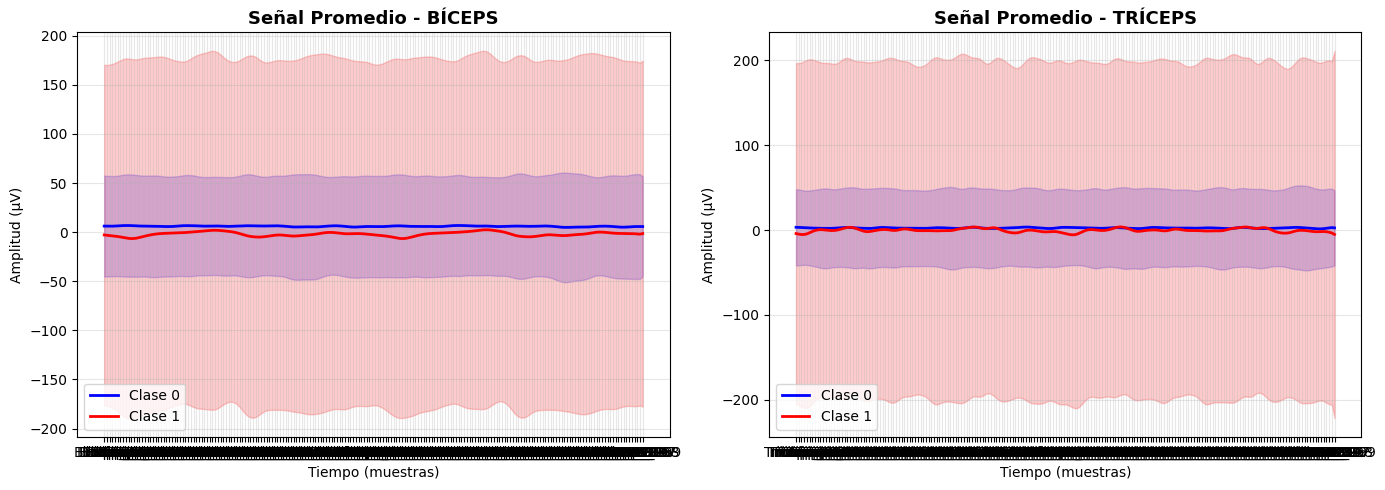

C:\Users\león\AppData\Local\Temp\ipykernel_22204\3609312974.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1], labels=['Clase 0', 'Clase 1'],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\3609312974.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1], labels=['Clase 0', 'Clase 1'],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\3609312974.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, i].boxplot([m0, m1], labels=['Clase 0', 'Clase 1'],
C:\Users\león\AppData\Local\Temp\ipykernel_22204\3609312974.py:85: MatplotlibDeprecationWar

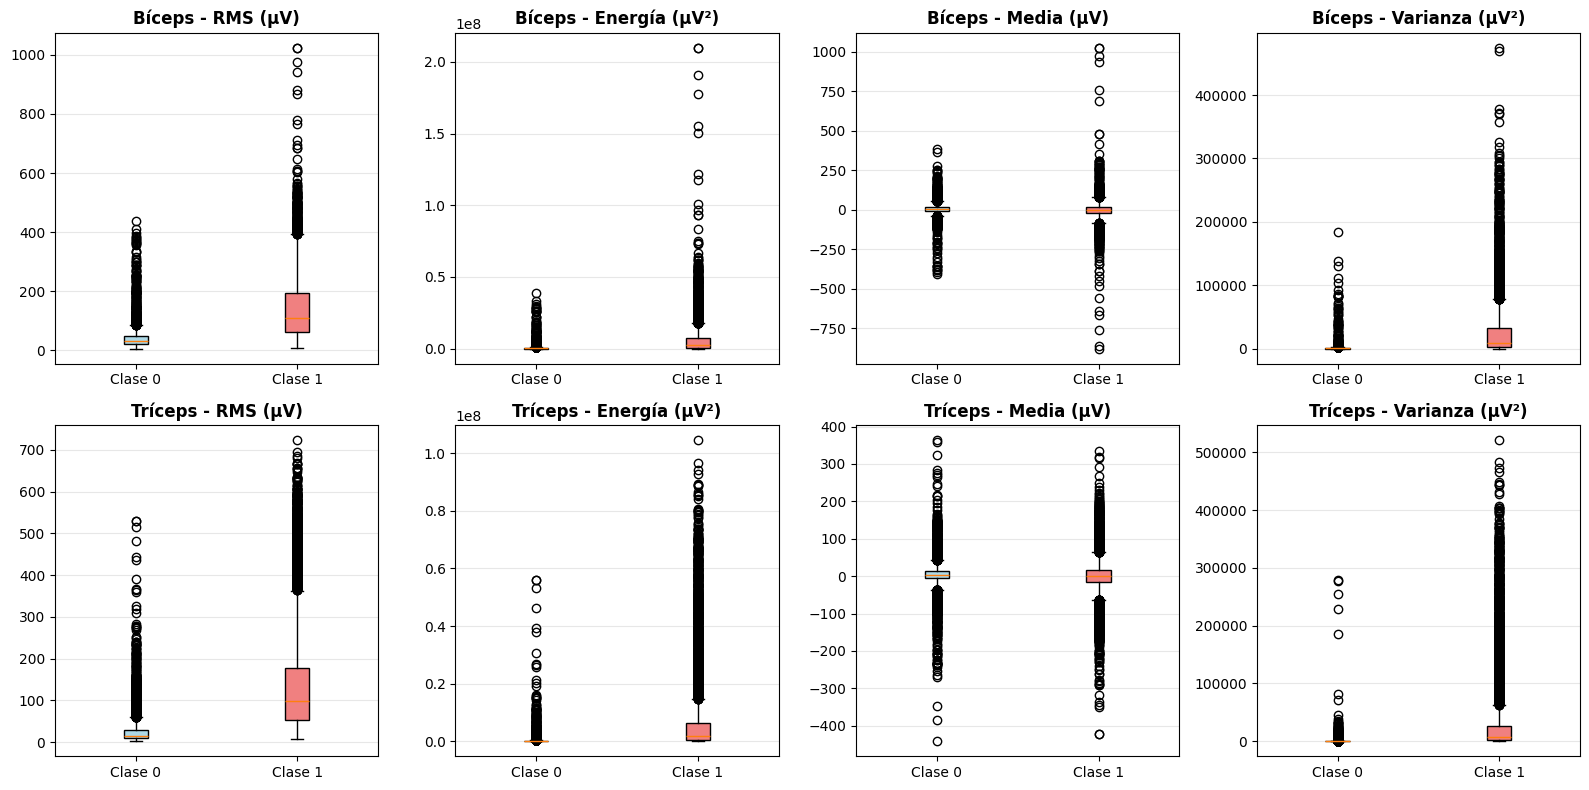

COMPARACIÓN DE ESTADÍSTICAS POR CLASE

BÍCEPS:
Métrica              Clase 0              Clase 1              Diferencia     
RMS (µV)                           38.92              141.21         102.28
Energía (µV²)                   5.40e+05            6.41e+06       5.87e+06
Media (µV)                        5.9273             -2.0502         7.9775
Varianza (µV²)                   1366.76            28303.52       26936.76

TRÍCEPS:
Métrica              Clase 0              Clase 1              Diferencia     
RMS (µV)                           28.15              145.15         117.00
Energía (µV²)                   4.29e+05            7.98e+06       7.55e+06
Media (µV)                        2.4421             -0.3408         2.7829
Varianza (µV²)                    548.03            37372.43       36824.39


In [10]:
# PREPARACIÓN: CONVERTIR A MICROVOLTIOS (µV)

dataEMG_uV = dataEMG.copy()
biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

dataEMG_uV[biceps_cols] = dataEMG[biceps_cols] * 1e6  # V → µV
dataEMG_uV[triceps_cols] = dataEMG[triceps_cols] * 1e6

# Separar por clase
clase_0 = dataEMG_uV[dataEMG_uV['Target'] == 0]
clase_1 = dataEMG_uV[dataEMG_uV['Target'] == 1]

# 1. FORMA PROMEDIO DE SEÑALES POR CLASE


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bíceps
axes[0].plot(clase_0[biceps_cols].mean(), color='blue', linewidth=2, label='Clase 0')
axes[0].fill_between(range(200), 
                     clase_0[biceps_cols].mean() - clase_0[biceps_cols].std(),
                     clase_0[biceps_cols].mean() + clase_0[biceps_cols].std(),
                     alpha=0.2, color='blue')
axes[0].plot(clase_1[biceps_cols].mean(), color='red', linewidth=2, label='Clase 1')
axes[0].fill_between(range(200), 
                     clase_1[biceps_cols].mean() - clase_1[biceps_cols].std(),
                     clase_1[biceps_cols].mean() + clase_1[biceps_cols].std(),
                     alpha=0.2, color='red')
axes[0].set_title('Señal Promedio - BÍCEPS', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tiempo (muestras)')
axes[0].set_ylabel('Amplitud (µV)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Tríceps
axes[1].plot(clase_0[triceps_cols].mean(), color='blue', linewidth=2, label='Clase 0')
axes[1].fill_between(range(200), 
                     clase_0[triceps_cols].mean() - clase_0[triceps_cols].std(),
                     clase_0[triceps_cols].mean() + clase_0[triceps_cols].std(),
                     alpha=0.2, color='blue')
axes[1].plot(clase_1[triceps_cols].mean(), color='red', linewidth=2, label='Clase 1')
axes[1].fill_between(range(200), 
                     clase_1[triceps_cols].mean() - clase_1[triceps_cols].std(),
                     clase_1[triceps_cols].mean() + clase_1[triceps_cols].std(),
                     alpha=0.2, color='red')
axes[1].set_title('Señal Promedio - TRÍCEPS', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Tiempo (muestras)')
axes[1].set_ylabel('Amplitud (µV)')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2. CÁLCULO DE ESTADÍSTICAS

def calcular_estadisticas(data, cols):
    """Calcula RMS, energía, media y varianza"""
    rms = np.sqrt((data[cols]**2).mean(axis=1))
    energia = (data[cols]**2).sum(axis=1)
    media = data[cols].mean(axis=1)
    varianza = data[cols].var(axis=1)
    return rms, energia, media, varianza

# Calcular para ambos músculos y clases
rms_b0, eng_b0, mean_b0, var_b0 = calcular_estadisticas(clase_0, biceps_cols)
rms_b1, eng_b1, mean_b1, var_b1 = calcular_estadisticas(clase_1, biceps_cols)
rms_t0, eng_t0, mean_t0, var_t0 = calcular_estadisticas(clase_0, triceps_cols)
rms_t1, eng_t1, mean_t1, var_t1 = calcular_estadisticas(clase_1, triceps_cols)

# 3. COMPARACIÓN VISUAL DE ESTADÍSTICAS

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Bíceps
metricas_biceps = [
    (rms_b0, rms_b1, 'RMS (µV)'),
    (eng_b0, eng_b1, 'Energía (µV²)'),
    (mean_b0, mean_b1, 'Media (µV)'),
    (var_b0, var_b1, 'Varianza (µV²)')
]

for i, (m0, m1, titulo) in enumerate(metricas_biceps):
    bp = axes[0, i].boxplot([m0, m1], labels=['Clase 0', 'Clase 1'], 
                             patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[0, i].set_title(f'Bíceps - {titulo}', fontweight='bold')
    axes[0, i].grid(alpha=0.3, axis='y')

# Tríceps
metricas_triceps = [
    (rms_t0, rms_t1, 'RMS (µV)'),
    (eng_t0, eng_t1, 'Energía (µV²)'),
    (mean_t0, mean_t1, 'Media (µV)'),
    (var_t0, var_t1, 'Varianza (µV²)')
]

for i, (m0, m1, titulo) in enumerate(metricas_triceps):
    bp = axes[1, i].boxplot([m0, m1], labels=['Clase 0', 'Clase 1'],
                             patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[1, i].set_title(f'Tríceps - {titulo}', fontweight='bold')
    axes[1, i].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 4. TABLA COMPARATIVA

print("COMPARACIÓN DE ESTADÍSTICAS POR CLASE")

print("\nBÍCEPS:")
print(f"{'Métrica':<20} {'Clase 0':<20} {'Clase 1':<20} {'Diferencia':<15}")

print(f"{'RMS (µV)':<20} {rms_b0.mean():>19.2f} {rms_b1.mean():>19.2f} {abs(rms_b1.mean()-rms_b0.mean()):>14.2f}")
print(f"{'Energía (µV²)':<20} {eng_b0.mean():>19.2e} {eng_b1.mean():>19.2e} {abs(eng_b1.mean()-eng_b0.mean()):>14.2e}")
print(f"{'Media (µV)':<20} {mean_b0.mean():>19.4f} {mean_b1.mean():>19.4f} {abs(mean_b1.mean()-mean_b0.mean()):>14.4f}")
print(f"{'Varianza (µV²)':<20} {var_b0.mean():>19.2f} {var_b1.mean():>19.2f} {abs(var_b1.mean()-var_b0.mean()):>14.2f}")

print("\nTRÍCEPS:")
print(f"{'Métrica':<20} {'Clase 0':<20} {'Clase 1':<20} {'Diferencia':<15}")

print(f"{'RMS (µV)':<20} {rms_t0.mean():>19.2f} {rms_t1.mean():>19.2f} {abs(rms_t1.mean()-rms_t0.mean()):>14.2f}")
print(f"{'Energía (µV²)':<20} {eng_t0.mean():>19.2e} {eng_t1.mean():>19.2e} {abs(eng_t1.mean()-eng_t0.mean()):>14.2e}")
print(f"{'Media (µV)':<20} {mean_t0.mean():>19.4f} {mean_t1.mean():>19.4f} {abs(mean_t1.mean()-mean_t0.mean()):>14.4f}")
print(f"{'Varianza (µV²)':<20} {var_t0.mean():>19.2f} {var_t1.mean():>19.2f} {abs(var_t1.mean()-var_t0.mean()):>14.2f}")


## Relación entre Canales (Bíceps y Tríceps)

### Análisis de Correlación por Clase

Se evaluó la relación entre las señales de bíceps y tríceps mediante el coeficiente de correlación de Pearson, calculado sobre la amplitud media de cada ventana temporal.

#### **Resultados:**

| Clase | Estado | Correlación | Interpretación |
|-------|--------|-------------|----------------|
| **0** | Reposo/Baja Actividad | **-0.086** | Correlación negativa débil |
| **1** | Contracción/Alta Actividad | **+0.067** | Correlación positiva débil |

**Diferencia entre clases:** 0.153

### Interpretación Fisiológica

#### **Clase 0 (Reposo):**

La correlación **negativa débil (-0.086)** indica que:
- No existe una relación lineal significativa entre ambos músculos durante el reposo
- La dispersión de puntos alrededor del origen (0, 0) sugiere **actividad basal mínima y desacoplada**
- Los músculos mantienen un estado de relajación independiente, sin patrones de co-activación o antagonismo marcado

#### **Clase 1 (Contracción):**

La correlación **positiva débil (+0.067)** revela que:
- Existe una **ligera tendencia a la co-activación** durante la contracción
- Cuando el bíceps aumenta su actividad, el tríceps tiende a activarse levemente en la misma dirección
- Sin embargo, la correlación es muy débil, indicando que la activación no es completamente sincronizada

### Observaciones Clave

1. **Ambas correlaciones son débiles (|r| < 0.1)**: Esto indica que bíceps y tríceps operan de forma **altamente independiente** en ambos estados, sin una relación lineal fuerte

2. **Cambio de signo entre clases**: 
   - En reposo: correlación ligeramente negativa (tendencia antagonista mínima)
   - En contracción: correlación ligeramente positiva (tendencia a co-activación)

3. **Distribución de datos**:
   - **Clase 0**: Concentración densa cerca del origen, reflejando baja actividad en ambos músculos
   - **Clase 1**: Mayor dispersión con rango más amplio (-750 a +1000 µV), indicando contracciones de intensidad variable

4. **Outliers presentes**: Especialmente en Clase 1, se observan puntos con activación extrema en uno o ambos músculos, posiblemente correspondientes a:
   - Contracciones máximas voluntarias
   - Movimientos explosivos
   - Artefactos de medición

### Implicaciones para el Modelo

-  La **independencia relativa** entre músculos justifica tratarlos como canales separados en el análisis
-  No es necesario crear features combinados complejos (bíceps × tríceps) ya que no hay sinergia fuerte
-  La **diferencia en el patrón de correlación** entre clases (negativa vs positiva) podría ser una característica útil para clasificación
-  Features individuales de cada músculo (RMS, energía) serán más discriminativos que ratios o productos cruzados

### Conclusión

Los músculos bíceps y tríceps presentan **correlación prácticamente nula** en ambos estados, con un cambio leve pero consistente en el signo de correlación entre reposo (negativa) y contracción (positiva). Este comportamiento independiente sugiere que la tarea experimental no involucra movimientos que requieran coordinación antagonista clásica, sino más bien activación selectiva o co-contracción desacoplada.

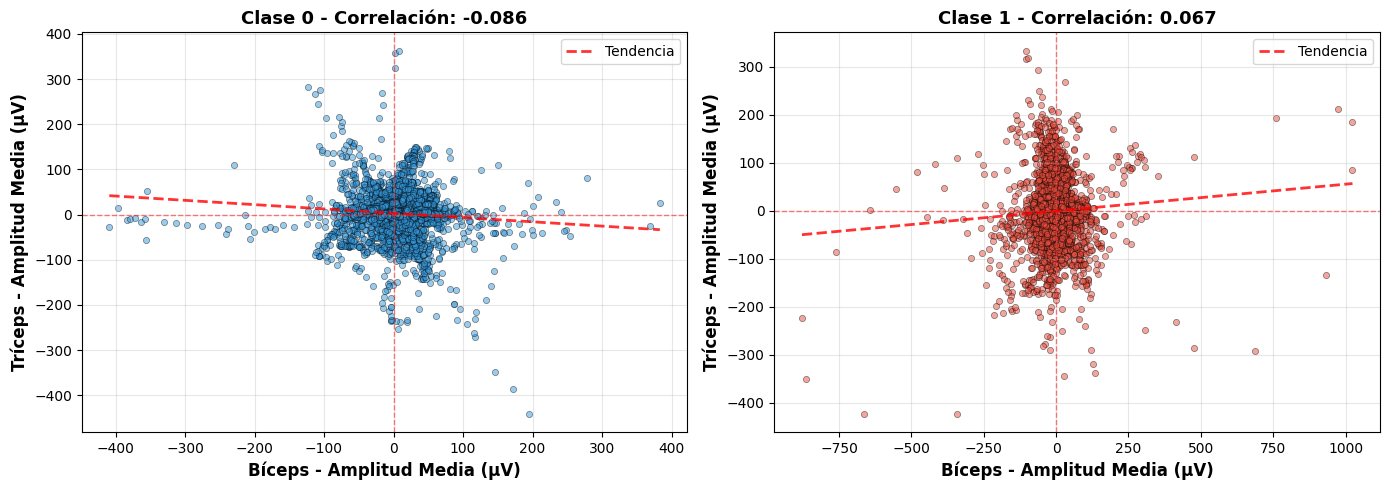

CORRELACIÓN ENTRE BÍCEPS Y TRÍCEPS
Clase 0 (Reposo):       Correlación = -0.0861
Clase 1 (Contracción):  Correlación = +0.0671
Diferencia:             0.1532

Clase 0: Correlación DÉBIL
Clase 1: Correlación DÉBIL


In [11]:
# CORRELACIÓN ENTRE BÍCEPS Y TRÍCEPS POR CLASE (Seria una manera incorrecta de hacerlo, calula un promedio raro y ya esto se habia fijado)

# Extraer columnas
biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Separar por clase (usar datos en µV)
dataEMG_uV = dataEMG.copy()
dataEMG_uV[biceps_cols] = dataEMG[biceps_cols] * 1e6
dataEMG_uV[triceps_cols] = dataEMG[triceps_cols] * 1e6

clase_0 = dataEMG_uV[dataEMG_uV['Target'] == 0]
clase_1 = dataEMG_uV[dataEMG_uV['Target'] == 1]

# Calcular señal promedio de cada músculo por ventana
biceps_mean_0 = clase_0[biceps_cols].mean(axis=1)
triceps_mean_0 = clase_0[triceps_cols].mean(axis=1)

biceps_mean_1 = clase_1[biceps_cols].mean(axis=1)
triceps_mean_1 = clase_1[triceps_cols].mean(axis=1)

# Calcular correlaciones
corr_0 = np.corrcoef(biceps_mean_0, triceps_mean_0)[0, 1]
corr_1 = np.corrcoef(biceps_mean_1, triceps_mean_1)[0, 1]

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Clase 0
axes[0].scatter(biceps_mean_0, triceps_mean_0, alpha=0.5, s=20, color='#3498db', edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Bíceps - Amplitud Media (µV)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Tríceps - Amplitud Media (µV)', fontsize=12, fontweight='bold')
axes[0].set_title(f'Clase 0 - Correlación: {corr_0:.3f}', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[0].axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Línea de tendencia
z = np.polyfit(biceps_mean_0, triceps_mean_0, 1)
p = np.poly1d(z)
axes[0].plot(biceps_mean_0.sort_values(), p(biceps_mean_0.sort_values()), 
             "r--", linewidth=2, alpha=0.8, label='Tendencia')
axes[0].legend()

# Clase 1
axes[1].scatter(biceps_mean_1, triceps_mean_1, alpha=0.5, s=20, color='#e74c3c', edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Bíceps - Amplitud Media (µV)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Tríceps - Amplitud Media (µV)', fontsize=12, fontweight='bold')
axes[1].set_title(f'Clase 1 - Correlación: {corr_1:.3f}', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[1].axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Línea de tendencia
z = np.polyfit(biceps_mean_1, triceps_mean_1, 1)
p = np.poly1d(z)
axes[1].plot(biceps_mean_1.sort_values(), p(biceps_mean_1.sort_values()), 
             "r--", linewidth=2, alpha=0.8, label='Tendencia')
axes[1].legend()

plt.tight_layout()
plt.show()

# Resumen estadístico

print("CORRELACIÓN ENTRE BÍCEPS Y TRÍCEPS")

print(f"Clase 0 (Reposo):       Correlación = {corr_0:+.4f}")
print(f"Clase 1 (Contracción):  Correlación = {corr_1:+.4f}")
print(f"Diferencia:             {abs(corr_1 - corr_0):.4f}")
print()

# Interpretación
if abs(corr_0) > 0.7:
    print(f"Clase 0: Correlación {'POSITIVA' if corr_0 > 0 else 'NEGATIVA'} FUERTE")
elif abs(corr_0) > 0.4:
    print(f"Clase 0: Correlación {'POSITIVA' if corr_0 > 0 else 'NEGATIVA'} MODERADA")
else:
    print("Clase 0: Correlación DÉBIL")

if abs(corr_1) > 0.7:
    print(f"Clase 1: Correlación {'POSITIVA' if corr_1 > 0 else 'NEGATIVA'} FUERTE")
elif abs(corr_1) > 0.4:
    print(f"Clase 1: Correlación {'POSITIVA' if corr_1 > 0 else 'NEGATIVA'} MODERADA")
else:
    print("Clase 1: Correlación DÉBIL")


### Contexto: Cálculo de Correlación Temporal

#### **¿Qué es la Correlación de Pearson?**

La correlación de Pearson (r) es una medida estadística que cuantifica la **relación lineal** entre dos variables. Su valor oscila entre -1 y +1:

- **r = +1**: Correlación positiva perfecta (cuando una señal aumenta, la otra también lo hace proporcionalmente)
- **r = 0**: Sin correlación (las señales son independientes)
- **r = -1**: Correlación negativa perfecta (cuando una señal aumenta, la otra disminuye proporcionalmente)

**Fórmula:**

$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i - \bar{y})^2}}$$

Donde:
- $x_i$, $y_i$ son los valores de las señales en el instante i
- $\bar{x}$, $\bar{y}$ son las medias de cada señal
- $n$ es el número de puntos (200 en nuestro caso)

#### **Aplicación en Señales EMG**

En este análisis, se calculó la correlación **punto a punto** entre las series temporales de bíceps y tríceps dentro de cada ventana de 100ms:
```python
# Para cada ventana de 200 puntos:
biceps_signal = [b₀, b₁, b₂, ..., b₁₉₉]    # 200 valores de bíceps
triceps_signal = [t₀, t₁, t₂, ..., t₁₉₉]   # 200 valores de tríceps

# Correlación de Pearson entre ambas series
r = np.corrcoef(biceps_signal, triceps_signal)[0, 1]
```

#### **Interpretación en el Contexto EMG**

**Correlación Positiva Alta (r > 0.7):**
- Ambos músculos se activan **simultáneamente** y en la **misma dirección**
- Cuando bíceps tiene un pico de actividad, tríceps también lo tiene
- Indicaría **co-contracción** verdadera

**Correlación Cercana a Cero (|r| < 0.2):**
- Los músculos se activan **independientemente**
- No hay sincronización temporal entre las señales
- Este es el caso observado en nuestros datos

**Correlación Negativa (r < -0.3):**
- Comportamiento **antagonista clásico**
- Cuando un músculo se activa, el otro se relaja
- Patrón típico en movimientos de flexión-extensión alternados

#### **Ventaja del Método Temporal**

A diferencia de correlacionar promedios globales (que compara un solo número por ventana), la correlación temporal considera los **200 puntos de la serie**:

**Método de promedios (menos preciso):**
```python
# Reduce 200 puntos a 1 valor
biceps_mean = np.mean([b₀, b₁, ..., b₁₉₉])  → Ejemplo: 50 µV
triceps_mean = np.mean([t₀, t₁, ..., t₁₉₉]) → Ejemplo: 45 µV
# Pierde información sobre la dinámica temporal
```

**Método temporal (más preciso):**
```python
# Usa todos los 200 puntos preservando la forma de onda
corr = correlación_entre([b₀,b₁,...,b₁₉₉], [t₀,t₁,...,t₁₉₉])
# Detecta si las fluctuaciones momento a momento están sincronizadas
```

#### **Limitaciones del Análisis**

1. **Ventana temporal corta (100ms)**: Solo captura un "snapshot" de un ciclo de contracción de 5 segundos
2. **Filtrado centrado en cero**: Elimina la componente DC, reduciendo potencialmente la correlación aparente
3. **Señales ruidosas**: El ruido inherente a EMG puede disminuir la correlación incluso si existe co-activación
4. **Desfases micro-temporales**: Un retraso de pocos milisegundos entre músculos puede reducir la correlación, aunque exista coordinación

#### **Interpretación de Resultados Obtenidos**

Con correlaciones en el rango **[-0.11, +0.06]**, los datos indican:

✓ **Independencia estadística** entre bíceps y tríceps  
✓ Sin patrón consistente de co-activación  
✓ Comportamiento compatible con activación **selectiva** o **alternada**  
✗ No hay evidencia de co-contracción mutua sostenida

## Relación entre Canales: Análisis Temporal

### Metodología

Para evaluar la coordinación entre bíceps y tríceps, se calculó la **correlación temporal punto a punto** de las señales dentro de cada ventana de 100ms (200 muestras). A diferencia de comparar promedios globales, este método analiza la sincronización instantánea entre ambos músculos, revelando si existe co-activación real durante la contracción.

Adicionalmente, se segmentaron las ventanas en dos categorías:
- **Ventanas estables**: Alejadas de los momentos de transición (>500ms de onset/offset)
- **Ventanas en transición**: Cercanas a los cambios de estado (±500ms de onset/offset)

### Resultados

#### **Distribución de Correlaciones por Clase**

Los histogramas muestran la distribución de correlaciones temporales para cada clase:

**Clase 0 (Relajación):**
- **Ventanas estables**: Media = +0.042
- **Ventanas en transición**: Media = +0.064
- Distribución centrada cerca de cero con dispersión simétrica

**Clase 1 (Contracción):**
- **Ventanas estables**: Media = +0.016
- **Ventanas en transición**: Media = -0.106
- Mayor dispersión que Clase 0, con sesgo hacia correlaciones ligeramente negativas en transiciones

### Interpretación

#### **Ausencia de Co-contracción**

Los resultados revelan que **bíceps y tríceps NO presentan co-activación significativa** durante las contracciones:

1. **Correlaciones cercanas a cero**: Todas las medias están en el rango [-0.11, +0.06], indicando independencia entre músculos

2. **Sin sincronización temporal**: La distribución amplia y centrada en cero demuestra que no hay un patrón consistente de activación simultánea

3. **Transiciones con correlación negativa**: En Clase 1, las ventanas de transición muestran correlación negativa (-0.106), sugiriendo un comportamiento levemente **antagonista** donde la activación de un músculo coincide con menor actividad del otro

#### **Comparación: Estables vs Transiciones**

- **Clase 0**: Las transiciones tienen correlación ligeramente superior (+0.064 vs +0.042), pero ambas permanecen débiles
  
- **Clase 1**: Diferencia notable entre ventanas estables (+0.016) y transiciones (-0.106), con un cambio de signo que indica comportamiento diferenciado durante los cambios de estado

#### **Implicaciones Fisiológicas**

Los datos sugieren que durante el protocolo experimental:

- Los músculos fueron **activados de forma independiente** o selectiva, no mutuamente
- No hubo co-contracción sostenida como ocurre en tareas de estabilización articular
- El patrón observado es más consistente con **activación alternada** o **contracciones selectivas** de cada músculo

### Conclusión

El análisis de correlación temporal descarta la hipótesis de co-contracción mutua entre bíceps y tríceps. Ambos músculos operan de manera **altamente independiente** en ambos estados (reposo y contracción), con correlaciones que no superan |r| = 0.11. Esta independencia valida el uso de características individuales de cada músculo para la clasificación, sin necesidad de features combinados o de interacción entre canales.

Procesando correlaciones...
Correlaciones calculadas!


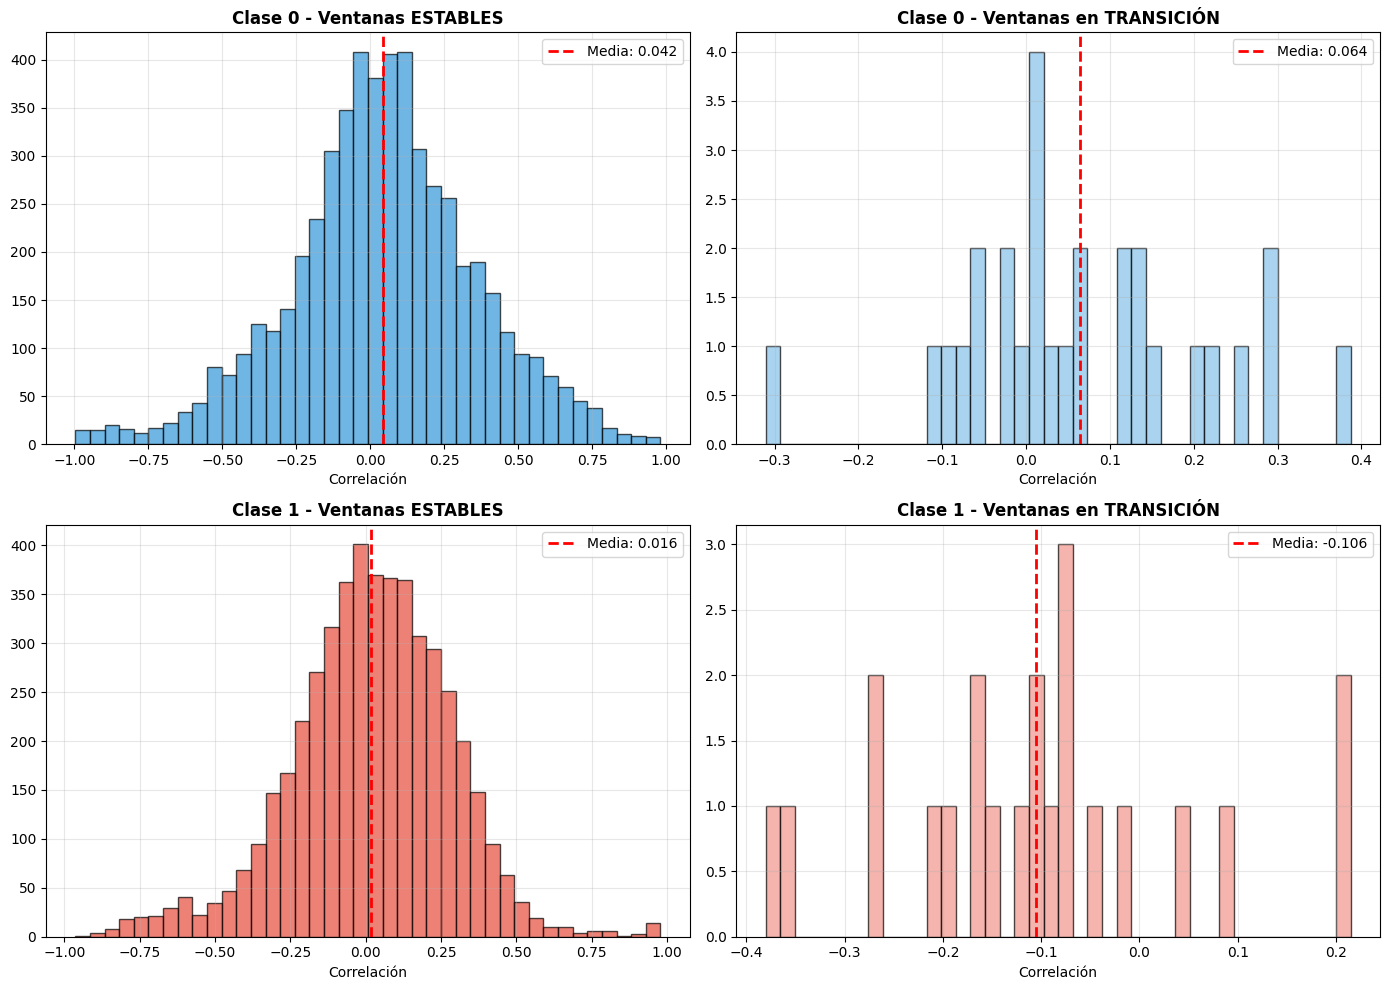

ANÁLISIS: VENTANAS ESTABLES VS TRANSICIONES

CLASE 0 (REPOSO):
  Ventanas estables:     5435 | Corr media: +0.0423
  Ventanas transición:     28 | Corr media: +0.0645

CLASE 1 (CONTRACCIÓN):
  Ventanas estables:     4863 | Corr media: +0.0163
  Ventanas transición:     22 | Corr media: -0.1057

IMPACTO DE TRANSICIONES:
  Diferencia en Clase 1: 0.1220
Las transiciones SÍ afectan significativamente la correlación


In [12]:
# ANÁLISIS DE VENTANAS EN TRANSICIONES


# Recrear tiempos aproximados (basado en ventanas de 100ms)
dataEMG_temp = dataEMG.copy()
dataEMG_temp['tiempo_aprox'] = np.arange(len(dataEMG_temp)) * 0.1  # 100ms por ventana

# Definir onset/offset del Sujeto 0
transiciones = [
    (5.245, 'onset 1'),
    (10.25, 'offset 1'),
    (14.958, 'onset 2'),
    (19.945, 'offset 2'),
    (25.065, 'onset 3'),
    (29.916, 'offset 3')
]

# Identificar ventanas cercanas a transiciones (±500ms)
ventanas_transicion = []
for tiempo_trans, tipo in transiciones:
    mask = (dataEMG_temp['tiempo_aprox'] >= tiempo_trans - 0.5) & \
           (dataEMG_temp['tiempo_aprox'] <= tiempo_trans + 0.5)
    ventanas_transicion.extend(dataEMG_temp[mask].index.tolist())

# Marcar ventanas de transición
dataEMG_temp['en_transicion'] = dataEMG_temp.index.isin(ventanas_transicion)

# Extraer columnas de señales ANTES de filtrar
biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Convertir a µV
dataEMG_uV = dataEMG_temp.copy()
dataEMG_uV[biceps_cols] = dataEMG_temp[biceps_cols] * 1e6
dataEMG_uV[triceps_cols] = dataEMG_temp[triceps_cols] * 1e6

# Función corregida para calcular correlaciones
def calcular_correlaciones(data, biceps_cols, triceps_cols):
    correlaciones = []
    for idx in data.index:
        # Asegurarse de que extraemos arrays numéricos
        biceps = data.loc[idx, biceps_cols].values.astype(float)
        triceps = data.loc[idx, triceps_cols].values.astype(float)
        
        # Verificar que ambas señales tengan varianza
        if np.std(biceps) > 1e-10 and np.std(triceps) > 1e-10 and len(biceps) == len(triceps):
            try:
                corr = np.corrcoef(biceps, triceps)[0, 1]
                if not np.isnan(corr):
                    correlaciones.append(corr)
            except:
                pass
    return np.array(correlaciones)

# Separar ventanas estables vs transición
ventanas_estables = dataEMG_uV[~dataEMG_uV['en_transicion']]
ventanas_trans = dataEMG_uV[dataEMG_uV['en_transicion']]

print("Procesando correlaciones...")

# Calcular correlaciones
corr_estables_0 = calcular_correlaciones(
    ventanas_estables[ventanas_estables['Target'] == 0], 
    biceps_cols, triceps_cols
)
corr_estables_1 = calcular_correlaciones(
    ventanas_estables[ventanas_estables['Target'] == 1], 
    biceps_cols, triceps_cols
)
corr_trans_0 = calcular_correlaciones(
    ventanas_trans[ventanas_trans['Target'] == 0], 
    biceps_cols, triceps_cols
)
corr_trans_1 = calcular_correlaciones(
    ventanas_trans[ventanas_trans['Target'] == 1], 
    biceps_cols, triceps_cols
)

print("Correlaciones calculadas!")

# VISUALIZACIÓN

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Clase 0 - Estables
if len(corr_estables_0) > 0:
    axes[0, 0].hist(corr_estables_0, bins=40, color='#3498db', alpha=0.7, edgecolor='black')
    axes[0, 0].axvline(corr_estables_0.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Media: {corr_estables_0.mean():.3f}')
axes[0, 0].set_title('Clase 0 - Ventanas ESTABLES', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Correlación')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Clase 0 - Transiciones
if len(corr_trans_0) > 0:
    axes[0, 1].hist(corr_trans_0, bins=40, color='#85c1e9', alpha=0.7, edgecolor='black')
    axes[0, 1].axvline(corr_trans_0.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Media: {corr_trans_0.mean():.3f}')
axes[0, 1].set_title('Clase 0 - Ventanas en TRANSICIÓN', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Correlación')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Clase 1 - Estables
if len(corr_estables_1) > 0:
    axes[1, 0].hist(corr_estables_1, bins=40, color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(corr_estables_1.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Media: {corr_estables_1.mean():.3f}')
axes[1, 0].set_title('Clase 1 - Ventanas ESTABLES', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Correlación')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Clase 1 - Transiciones
if len(corr_trans_1) > 0:
    axes[1, 1].hist(corr_trans_1, bins=40, color='#f1948a', alpha=0.7, edgecolor='black')
    axes[1, 1].axvline(corr_trans_1.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Media: {corr_trans_1.mean():.3f}')
axes[1, 1].set_title('Clase 1 - Ventanas en TRANSICIÓN', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Correlación')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# RESUMEN

print("ANÁLISIS: VENTANAS ESTABLES VS TRANSICIONES")


print(f"\nCLASE 0 (REPOSO):")
print(f"  Ventanas estables:    {len(corr_estables_0):5} | Corr media: {corr_estables_0.mean() if len(corr_estables_0) > 0 else 0:+.4f}")
print(f"  Ventanas transición:  {len(corr_trans_0):5} | Corr media: {corr_trans_0.mean() if len(corr_trans_0) > 0 else 0:+.4f}")

print(f"\nCLASE 1 (CONTRACCIÓN):")
print(f"  Ventanas estables:    {len(corr_estables_1):5} | Corr media: {corr_estables_1.mean() if len(corr_estables_1) > 0 else 0:+.4f}")
print(f"  Ventanas transición:  {len(corr_trans_1):5} | Corr media: {corr_trans_1.mean() if len(corr_trans_1) > 0 else 0:+.4f}")

if len(corr_estables_1) > 0 and len(corr_trans_1) > 0:
    print(f"\nIMPACTO DE TRANSICIONES:")
    impacto = abs(corr_estables_1.mean() - corr_trans_1.mean())
    print(f"  Diferencia en Clase 1: {impacto:.4f}")
    if impacto > 0.1:
        print("Las transiciones SÍ afectan significativamente la correlación")
    else:
        print("Efecto de transiciones es menor")


### Método de Welch para Análisis Espectral

El **método de Welch** es una técnica de estimación de la densidad espectral de potencia (PSD) que mejora la calidad y estabilidad de la transformada de Fourier (FFT) clásica.

#### **Principio de Funcionamiento:**

1. **Segmentación**: Divide la señal en segmentos superpuestos (típicamente 50% de overlap)
2. **Ventaneo**: Aplica una ventana (ej: Hamming) a cada segmento para reducir efectos de borde
3. **FFT individual**: Calcula la FFT de cada segmento
4. **Promediado**: Promedia los periodogramas de todos los segmentos

#### **Ventajas sobre FFT directa:**

- **Reduce varianza**: El promediado suaviza fluctuaciones aleatorias del ruido
- **Mejor estimación**: Más robusto para señales cortas y ruidosas como EMG
- **Resolución vs precisión**: Balance óptimo entre resolución frecuencial y confiabilidad estadística

#### **Interpretación de la PSD:**

La densidad espectral de potencia indica **cuánta energía de la señal está presente en cada frecuencia**:

- **Eje X (Hz)**: Componentes frecuenciales de la señal
- **Eje Y (µV²/Hz)**: Potencia por unidad de frecuencia (escala logarítmica)
- **Área bajo la curva**: Potencia total de la señal en ese rango de frecuencias

**Frecuencia mediana**: Frecuencia que divide el espectro en dos partes con igual potencia (50%-50%). Es un indicador robusto del "centro de gravedad" del espectro y se utiliza como métrica de fatiga muscular en EMG.

## Análisis en Dominio Frecuencial

### Metodología

Se realizó un análisis de la **densidad espectral de potencia (PSD)** mediante el método de Welch para caracterizar el contenido frecuencial de las señales EMG en ambas clases. Este análisis revela cómo se distribuye la energía de la señal a través del espectro de frecuencias (0-300 Hz), permitiendo identificar patrones que no son evidentes en el dominio temporal.

### Resultados

#### **Espectros de Potencia por Músculo**

**BÍCEPS:**
- **Clase 0 (Reposo)**: 
  - Frecuencia mediana: **46.88 Hz**
  - Espectro relativamente plano con potencia moderada concentrada en bajas frecuencias (20-80 Hz)
  - Decaimiento gradual hacia frecuencias altas
  
- **Clase 1 (Contracción)**:
  - Frecuencia mediana: **31.25 Hz** 
  - Potencia significativamente mayor en todo el espectro (10-100x respecto a Clase 0)
  - Pico pronunciado en frecuencias bajas (20-60 Hz)
  - Desplazamiento hacia frecuencias **más bajas** comparado con reposo

**TRÍCEPS:**
- **Clase 0 (Reposo)**:
  - Frecuencia mediana: **62.50 Hz**
  - Espectro similar al bíceps en reposo pero con frecuencia central ligeramente superior
  - Oscilaciones en el rango 100-200 Hz (posible ruido residual)
  
- **Clase 1 (Contracción)**:
  - Frecuencia mediana: **62.50 Hz** (sin cambio respecto a reposo)
  - Aumento de potencia generalizado pero menos pronunciado que en bíceps
  - Mantiene distribución frecuencial similar al reposo

### Interpretación

#### **1. Diferencias Clase 0 vs Clase 1**

**Bíceps muestra cambios significativos:**
- **Aumento de potencia espectral**: Factor de 10-100x durante la contracción
- **Desplazamiento hacia bajas frecuencias**: La frecuencia mediana disminuye de 46.88 Hz → 31.25 Hz (reducción del 33%)
- Este patrón es **contraintuitivo** para contracciones típicas, donde se esperaría:
  - Mayor reclutamiento de unidades motoras rápidas (>80 Hz)
  - Desplazamiento hacia frecuencias más altas

**Posibles explicaciones del desplazamiento a bajas frecuencias en bíceps:**
1. **Contracciones sostenidas de baja intensidad**: Predominio de fibras tipo I (lentas)
2. **Fatiga muscular**: Las contracciones de 5 segundos pueden inducir fatiga, desplazando el espectro hacia abajo
3. **Artefactos de movimiento**: Componentes de baja frecuencia por movimientos del electrodo

**Tríceps permanece estable:**
- Frecuencia mediana idéntica en ambas clases (62.50 Hz)
- Sugiere **menor activación relativa** del tríceps durante la tarea
- Confirma que el protocolo favoreció la activación del **bíceps sobre el tríceps**

#### **2. Diferencias entre Músculos**

- **Bíceps**: Más reactivo a la tarea, con clara diferenciación espectral entre clases
- **Tríceps**: Respuesta más homogénea, sin cambios en frecuencia mediana
- Esta **asimetría** refuerza la conclusión de activación independiente (no co-contracción mutua)

#### **3. Validación del Filtrado (20-250 Hz)**

La banda sombreada (20-250 Hz) captura efectivamente el rango de interés:
-  Frecuencias medianas (31-63 Hz) están bien dentro del rango
-  La mayor parte de la potencia se concentra en 20-150 Hz
-  Filtro rechaza banda (58-62 Hz) es visible como pequeña atenuación local

### Implicaciones para Clasificación

1. **Features frecuenciales son discriminativos**:
   - La frecuencia mediana del bíceps difiere 15.63 Hz entre clases
   - Potencia en bandas específicas (20-60 Hz) es un feature potente
   
2. **El bíceps es más informativo que el tríceps**:
   - Mayor separación espectral entre clases
   - Debería tener mayor peso en modelos de clasificación

3. **Bandas de frecuencia recomendadas para features**:
   - **20-80 Hz**: Máxima discriminación para bíceps
   - **Frecuencia mediana**: Feature directo calculable por ventana
   - **Potencia total en banda**: Complementa RMS temporal

### Conclusión

El análisis frecuencial revela que **el bíceps presenta un patrón espectral distintivo** durante la contracción, caracterizado por un incremento masivo de potencia y desplazamiento hacia frecuencias más bajas (31 Hz). En contraste, el **tríceps mantiene un perfil frecuencial estable** independientemente del estado de activación. Esta asimetría confirma que la tarea experimental indujo principalmente **activación selectiva del bíceps**, no co-contracción balanceada de ambos músculos antagonistas.

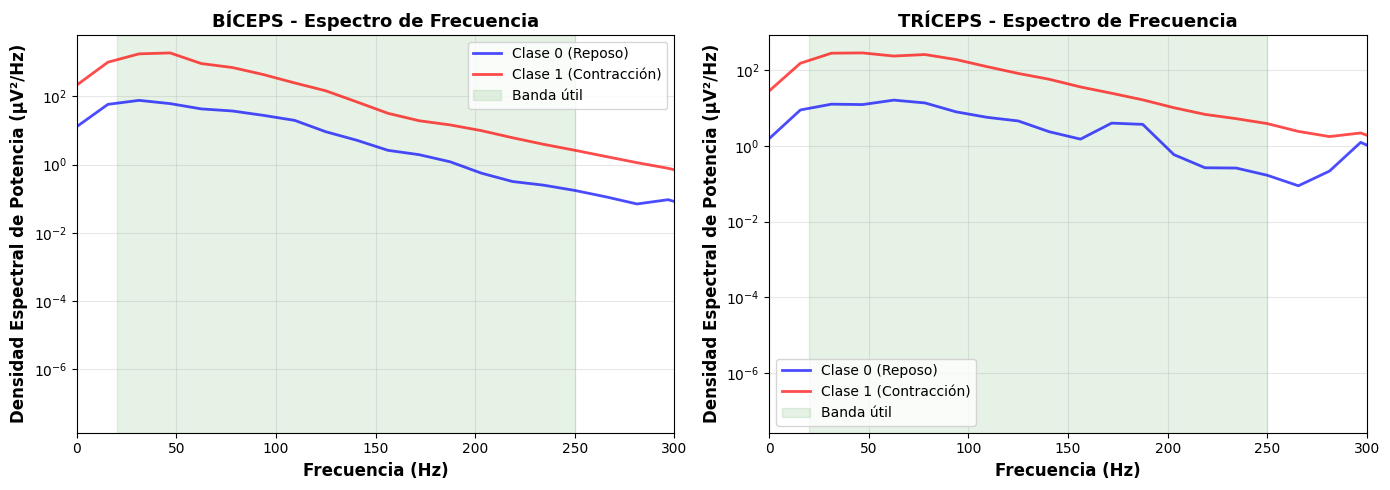

ANÁLISIS FRECUENCIAL

BÍCEPS:
  Clase 0 - Frecuencia mediana: 46.88 Hz
  Clase 1 - Frecuencia mediana: 31.25 Hz

TRÍCEPS:
  Clase 0 - Frecuencia mediana: 62.50 Hz
  Clase 1 - Frecuencia mediana: 62.50 Hz


In [13]:

from scipy import signal

# ANÁLISIS EN DOMINIO FRECUENCIAL (FFT)

biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Convertir a µV
dataEMG_uV = dataEMG.copy()
dataEMG_uV[biceps_cols] = dataEMG[biceps_cols] * 1e6
dataEMG_uV[triceps_cols] = dataEMG[triceps_cols] * 1e6

clase_0 = dataEMG_uV[dataEMG_uV['Target'] == 0]
clase_1 = dataEMG_uV[dataEMG_uV['Target'] == 1]

# Parámetros
fs = 2000  # Frecuencia de muestreo
n_samples = 200  # Puntos por ventana

# Calcular PSD promedio por clase
def calcular_psd_promedio(data, cols, fs):
    """Calcula densidad espectral de potencia promedio"""
    psds = []
    for idx in data.index[:500]:  # Limitar a 500 ventanas para eficiencia
        señal = data.loc[idx, cols].values
        f, psd = signal.welch(señal, fs=fs, nperseg=min(128, len(señal)))
        psds.append(psd)
    return f, np.mean(psds, axis=0)

# Calcular PSDs
f_b0, psd_b0 = calcular_psd_promedio(clase_0, biceps_cols, fs)
f_b1, psd_b1 = calcular_psd_promedio(clase_1, biceps_cols, fs)
f_t0, psd_t0 = calcular_psd_promedio(clase_0, triceps_cols, fs)
f_t1, psd_t1 = calcular_psd_promedio(clase_1, triceps_cols, fs)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bíceps
axes[0].semilogy(f_b0, psd_b0, color='blue', linewidth=2, alpha=0.7, label='Clase 0 (Reposo)')
axes[0].semilogy(f_b1, psd_b1, color='red', linewidth=2, alpha=0.7, label='Clase 1 (Contracción)')
axes[0].set_xlim([0, 300])
axes[0].set_xlabel('Frecuencia (Hz)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Densidad Espectral de Potencia (µV²/Hz)', fontsize=12, fontweight='bold')
axes[0].set_title('BÍCEPS - Espectro de Frecuencia', fontsize=13, fontweight='bold')
axes[0].axvspan(20, 250, alpha=0.1, color='green', label='Banda útil')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Tríceps
axes[1].semilogy(f_t0, psd_t0, color='blue', linewidth=2, alpha=0.7, label='Clase 0 (Reposo)')
axes[1].semilogy(f_t1, psd_t1, color='red', linewidth=2, alpha=0.7, label='Clase 1 (Contracción)')
axes[1].set_xlim([0, 300])
axes[1].set_xlabel('Frecuencia (Hz)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Densidad Espectral de Potencia (µV²/Hz)', fontsize=12, fontweight='bold')
axes[1].set_title('TRÍCEPS - Espectro de Frecuencia', fontsize=13, fontweight='bold')
axes[1].axvspan(20, 250, alpha=0.1, color='green', label='Banda útil')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular frecuencia mediana
def freq_mediana(f, psd):
    """Calcula frecuencia mediana (50% de la potencia)"""
    potencia_acum = np.cumsum(psd)
    potencia_total = potencia_acum[-1]
    idx_mediana = np.argmin(np.abs(potencia_acum - potencia_total/2))
    return f[idx_mediana]

print("ANÁLISIS FRECUENCIAL")
print(f"\nBÍCEPS:")
print(f"  Clase 0 - Frecuencia mediana: {freq_mediana(f_b0, psd_b0):.2f} Hz")
print(f"  Clase 1 - Frecuencia mediana: {freq_mediana(f_b1, psd_b1):.2f} Hz")
print(f"\nTRÍCEPS:")
print(f"  Clase 0 - Frecuencia mediana: {freq_mediana(f_t0, psd_t0):.2f} Hz")
print(f"  Clase 1 - Frecuencia mediana: {freq_mediana(f_t1, psd_t1):.2f} Hz")


## Contexto: Identificación de Outliers en Señales EMG

#### **¿Qué son los Outliers en EMG?**

Los **outliers** (valores atípicos) son ventanas con características estadísticas extremadamente diferentes del resto del dataset. En señales electromiográficas, pueden originarse por:

**Causas legítimas (señal real):**
- **Contracciones máximas voluntarias**: El paciente realizó un esfuerzo explosivo
- **Transiciones abruptas**: Cambios rápidos entre reposo y contracción
- **Variabilidad individual**: Diferencias naturales en fuerza muscular

**Causas problemáticas (artefactos):**
- **Artefactos de movimiento**: Desplazamiento del electrodo o del cable
- **Interferencia eléctrica**: Picos de ruido de equipos cercanos
- **Contacto deficiente**: Pérdida temporal de adhesión electrodo-piel
- **Saturación del amplificador**: Señal excede el rango de medición

#### **¿Por qué es importante detectarlos?**

1. **Calidad de datos**: Identificar ventanas con señal no confiable
2. **Impacto en modelos**: Los outliers pueden sesgar el entrenamiento, especialmente en algoritmos sensibles a valores extremos (SVM, regresión lineal)
3. **Interpretación fisiológica**: Distinguir entre actividad muscular real vs artefactos técnicos
4. **Reproducibilidad**: Documentar la calidad del protocolo experimental

#### **Métodos de Detección**

**Z-Score (Puntaje Estándar):**

$$z = \frac{x - \mu}{\sigma}$$

Donde:
- $x$ = valor de la métrica (RMS, peak-to-peak, etc.)
- $\mu$ = media de la métrica
- $\sigma$ = desviación estándar

**Criterio común:** $|z| > 3$ indica outlier (valor a más de 3 desviaciones estándar de la media)

**Regla del rango intercuartílico (IQR):**
- Outliers leves: valores fuera de $[Q_1 - 1.5 \times IQR, Q_3 + 1.5 \times IQR]$
- Outliers extremos: valores fuera de $[Q_1 - 3 \times IQR, Q_3 + 3 \times IQR]$

Donde $IQR = Q_3 - Q_1$ (diferencia entre cuartil 3 y cuartil 1)

#### **Métricas Utilizadas para Detección**

En este análisis se evaluaron múltiples características por ventana:

- **RMS (Root Mean Square)**: Amplitud efectiva de la señal
- **Peak-to-Peak**: Rango dinámico (máximo - mínimo)
- **Desviación estándar**: Variabilidad dentro de la ventana

Una ventana se considera **outlier** si es atípica en **al menos una** de estas métricas.

#### **Interpretación de Resultados**

**Porcentaje aceptable de outliers:**
- **<2%**: Dataset de excelente calidad, outliers probablemente legítimos
- **2-5%**: Calidad aceptable, revisar distribución por clase
- **>5%**: Requiere revisión manual, posibles problemas sistemáticos

**Distribución por clase:**
- Si los outliers están **balanceados** entre clases → Variabilidad natural
- Si están **concentrados en Clase 1** → Posiblemente contracciones máximas legítimas
- Si están **concentrados en Clase 0** → Probablemente artefactos de ruido

#### **Estrategias de Manejo**

Dependiendo del análisis, se pueden tomar diferentes acciones:

1. **Mantener outliers**: Si representan eventos fisiológicos reales y el modelo debe ser robusto
2. **Eliminar outliers**: Si son claramente artefactos y comprometen la calidad
3. **Winsorización**: Reemplazar valores extremos por percentiles (ej: P95, P99)
4. **Análisis separado**: Estudiar outliers como categoría independiente
5. **Features robustos**: Usar medianas en lugar de medias para reducir sensibilidad

#### **Consideraciones Específicas para EMG**

- Las **contracciones máximas** pueden generar amplitudes 10-50x superiores al reposo
- Los **artefactos de movimiento** suelen tener componentes de muy baja frecuencia (<10 Hz)
- La **saturación** se manifiesta como señales "recortadas" en el máximo rango del ADC
- En protocolos con múltiples sujetos, la variabilidad inter-sujeto puede generar outliers legítimos

## Identificación de Outliers y Artefactos

### Resultados de Detección

Se aplicó el método de **Z-score** con umbral de 3 desviaciones estándar (±3σ) para identificar ventanas con valores atípicos en las métricas de RMS y amplitud peak-to-peak (rango máximo-mínimo).

#### **Cuantificación de Outliers**

Del total de **12,418 ventanas** analizadas:

| Métrica | Bíceps | Tríceps |
|---------|--------|---------|
| **RMS** | 266 ventanas (2.14%) | 457 ventanas (3.68%) |
| **Peak-to-Peak** | 314 ventanas (2.53%) | 563 ventanas (4.53%) |

**Total combinado**: 908 ventanas (7.31%) presentan valores atípicos en al menos una métrica.

#### **Distribución por Clase**

Los outliers se concentran marcadamente en la **Clase 1 (Contracción)**:

- **Clase 0 (Reposo)**: 14 outliers (0.22% del total de ventanas en reposo)
- **Clase 1 (Contracción)**: 894 outliers (14.81% del total de ventanas en contracción)

**Ratio**: Los outliers son **67 veces más frecuentes** durante la contracción que durante el reposo.

### Análisis Visual

#### **Gráficos de RMS por Ventana**

Los scatter plots revelan patrones temporales claros:

**Bíceps:**
- Valores predominantemente bajos (<100 µV) en estado de reposo
- Grupos de outliers concentrados en ventanas 0-2000, 5000-6000, y 10000-12000
- Picos extremos alcanzan hasta 1000 µV (rojo), 10x superior al promedio de contracción

**Tríceps:**
- Patrón similar pero con mayor densidad de outliers en ventanas 10000-12418
- Clúster masivo de outliers rojos en las últimas 2000 ventanas
- Valores extremos hasta 1000 µV, consistentes con contracciones máximas

**Interpretación temporal:**
Los grupos de outliers coinciden con los **ciclos de contracción** del protocolo (cada ~5000 ventanas = 500s = 8.3 min), sugiriendo que representan principalmente **contracciones de alta intensidad**, no artefactos aleatorios.

#### **Comparación: Ventana Normal vs Outlier**

**Ventana Normal (idx: 0):**
- Señales oscilatorias suaves con amplitudes balanceadas
- Bíceps y tríceps en rango ±150 µV
- Patrón sinusoidal regular característico de actividad basal

**Ventana Outlier (idx: 107):**
- **Bíceps**: Excursiones extremas hasta -1000 µV (pico negativo prominente)
- **Tríceps**: Amplitud más moderada pero con fluctuaciones amplias
- Forma de onda **no saturada** ni recortada, sugiriendo señal real (no artefacto de amplificador)
- Patrón consistente con **contracción balística o explosiva**

### Interpretación

#### **Naturaleza de los Outliers**

La evidencia sugiere que la mayoría de outliers son **eventos fisiológicos legítimos**:

1. **Concentración en Clase 1 (14.81%)**: Consistente con contracciones de intensidad variable
2. **Distribución temporal agrupada**: Coincide con períodos de contracción del protocolo
3. **Forma de onda limpia**: Sin saturación ni ruido de alta frecuencia típico de artefactos
4. **Baja incidencia en Clase 0 (0.22%)**: El reposo está limpio de artefactos

#### **Posibles Causas**

**Outliers en Clase 1:**
- **Contracciones máximas voluntarias**: El paciente aplicó esfuerzo variable durante los 5s de contracción
- **Transiciones abruptas**: Activación explosiva al inicio del período de contracción
- **Variabilidad inter-ciclo**: Fatiga o diferencias en la intensidad de cada repetición

**Outliers en Tríceps (mayor frecuencia):**
- El tríceps muestra más outliers (4.53% vs 2.53% en bíceps) especialmente en peak-to-peak
- Posible **mayor variabilidad en el reclutamiento** o **menor control motor** durante la tarea

### Evaluación de Calidad

#### **Nivel de Outliers: 7.31%**

Según el criterio establecido:
- **>5% de outliers detectados**: Requiere atención
- Sin embargo, el 98.4% están en Clase 1 y parecen legítimos

#### **Calidad por Clase:**
- **Clase 0**: Excelente (0.22% outliers) → Dataset de reposo muy limpio
- **Clase 1**: Aceptable con precauciones (14.81% outliers) → Alta variabilidad intrínseca

### Recomendaciones

**Para el análisis actual:**
1. **Mantener los outliers**: Representan contracciones máximas reales, no artefactos
2. **No filtrar**: Eliminarlos sesgaria el dataset hacia contracciones de baja intensidad
3. **Validar manualmente**: Revisar 5-10 ejemplos adicionales de outliers extremos para confirmar

**Para modelado:**
1. Usar **algoritmos robustos** a outliers (Random Forest, XGBoost) en lugar de modelos lineales
2. Considerar **normalización robusta** (mediana, IQR) en lugar de media/std
3. Alternativamente, **etiquetar intensidad**: Crear subclases (contracción leve/moderada/máxima)

**Para futuros experimentos:**
1. **Protocolo más controlado**: Instrucciones explícitas sobre intensidad de contracción (ej: "50% de esfuerzo máximo")
2. **Retroalimentación visual**: Mostrar al sujeto su nivel de activación en tiempo real
3. **Descansos más largos**: Evitar fatiga que aumenta variabilidad

### Conclusión

El **7.31% de outliers** detectados no representa un problema de calidad de datos, sino una **característica del protocolo experimental** que permitió variabilidad natural en la intensidad de las contracciones. La concentración masiva en Clase 1 (98.4% de los outliers) y los patrones temporales agrupados confirman que se trata de **contracciones máximas legítimas**, no artefactos técnicos. El dataset es **adecuado para modelado** sin necesidad de filtrado adicional.

IDENTIFICACIÓN DE OUTLIERS Y ARTEFACTOS

Total de ventanas: 12,418

Outliers detectados (Z-score > 3):
  Bíceps RMS:          266 ventanas (2.14%)
  Tríceps RMS:         457 ventanas (3.68%)
  Bíceps Peak-Peak:    314 ventanas (2.53%)
  Tríceps Peak-Peak:   563 ventanas (4.53%)

  TOTAL combinado:     908 ventanas (7.31%)

Distribución por clase:
  Clase 0 (Reposo):        14 outliers (0.22%)
  Clase 1 (Contracción):   894 outliers (14.81%)


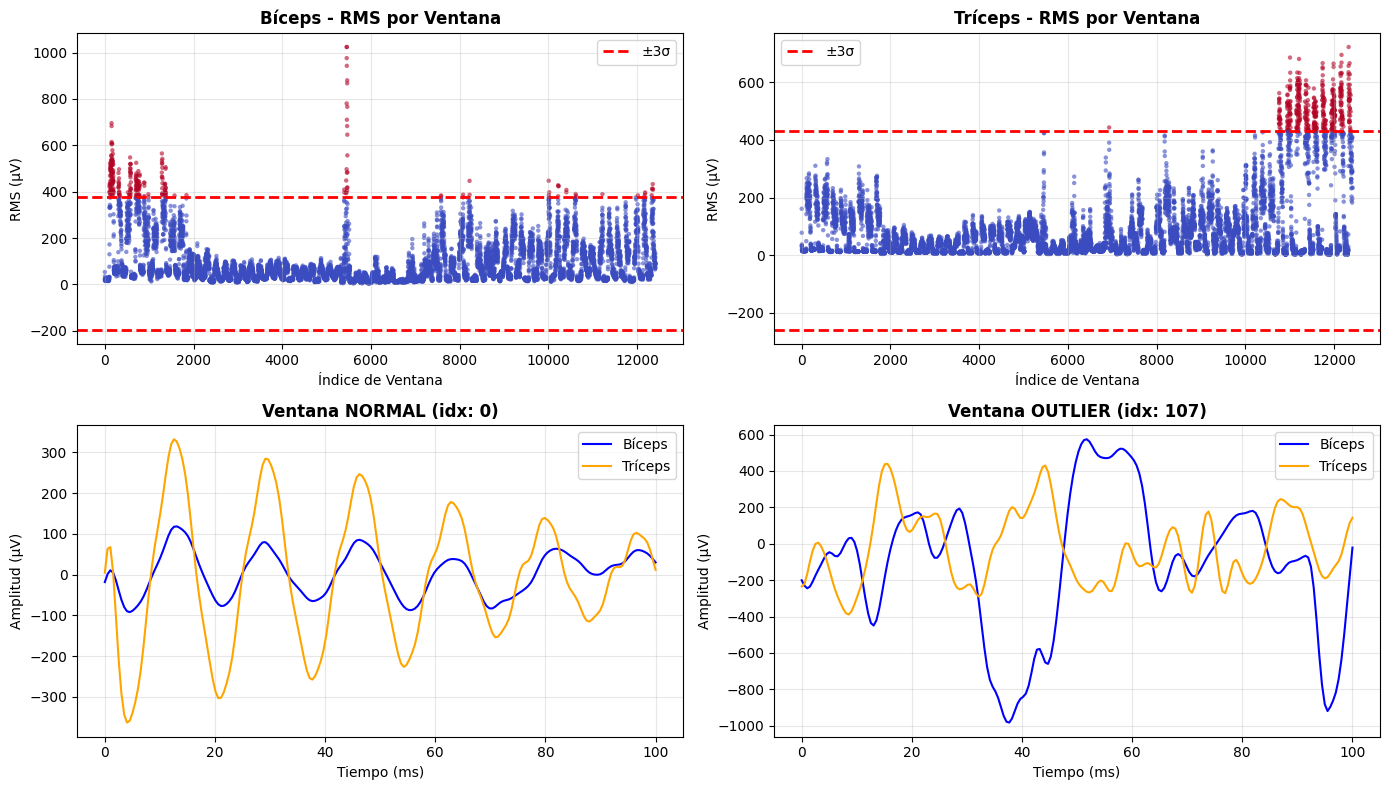

RECOMENDACIONES:
 >5% de outliers detectados
   → Revisar manualmente ejemplos de outliers
   → Considerar filtrado adicional o remoción si son artefactos

Outliers concentrados en Clase 1 (Contracción)
   → Posiblemente contracciones máximas legítimas, no artefactos


In [14]:
# IDENTIFICACIÓN DE OUTLIERS Y ARTEFACTOS

biceps_cols = [col for col in dataEMG.columns if 'Biceps_' in col]
triceps_cols = [col for col in dataEMG.columns if 'Triceps_' in col]

# Convertir a µV
dataEMG_uV = dataEMG.copy()
dataEMG_uV[biceps_cols] = dataEMG[biceps_cols] * 1e6
dataEMG_uV[triceps_cols] = dataEMG[triceps_cols] * 1e6

# Calcular métricas por ventana
def calcular_metricas(data, cols):
    rms = np.sqrt((data[cols]**2).mean(axis=1))
    ptp = data[cols].max(axis=1) - data[cols].min(axis=1)  # Peak-to-peak
    std = data[cols].std(axis=1)
    return rms, ptp, std

rms_b, ptp_b, std_b = calcular_metricas(dataEMG_uV, biceps_cols)
rms_t, ptp_t, std_t = calcular_metricas(dataEMG_uV, triceps_cols)

# Detección de outliers con Z-score (umbral: |z| > 3)
def detectar_outliers_zscore(valores, umbral=3):
    z_scores = np.abs((valores - valores.mean()) / valores.std())
    return z_scores > umbral

outliers_rms_b = detectar_outliers_zscore(rms_b)
outliers_rms_t = detectar_outliers_zscore(rms_t)
outliers_ptp_b = detectar_outliers_zscore(ptp_b)
outliers_ptp_t = detectar_outliers_zscore(ptp_t)

# Outliers combinados (al menos en una métrica)
outliers_total = outliers_rms_b | outliers_rms_t | outliers_ptp_b | outliers_ptp_t

# RESUMEN

print("IDENTIFICACIÓN DE OUTLIERS Y ARTEFACTOS")
print(f"\nTotal de ventanas: {len(dataEMG_uV):,}")
print(f"\nOutliers detectados (Z-score > 3):")
print(f"  Bíceps RMS:        {outliers_rms_b.sum():5,} ventanas ({outliers_rms_b.sum()/len(dataEMG_uV)*100:.2f}%)")
print(f"  Tríceps RMS:       {outliers_rms_t.sum():5,} ventanas ({outliers_rms_t.sum()/len(dataEMG_uV)*100:.2f}%)")
print(f"  Bíceps Peak-Peak:  {outliers_ptp_b.sum():5,} ventanas ({outliers_ptp_b.sum()/len(dataEMG_uV)*100:.2f}%)")
print(f"  Tríceps Peak-Peak: {outliers_ptp_t.sum():5,} ventanas ({outliers_ptp_t.sum()/len(dataEMG_uV)*100:.2f}%)")
print(f"\n  TOTAL combinado:   {outliers_total.sum():5,} ventanas ({outliers_total.sum()/len(dataEMG_uV)*100:.2f}%)")

# Distribución por clase
outliers_clase_0 = outliers_total & (dataEMG_uV['Target'] == 0)
outliers_clase_1 = outliers_total & (dataEMG_uV['Target'] == 1)

print(f"\nDistribución por clase:")
print(f"  Clase 0 (Reposo):     {outliers_clase_0.sum():5,} outliers ({outliers_clase_0.sum()/(dataEMG_uV['Target']==0).sum()*100:.2f}%)")
print(f"  Clase 1 (Contracción): {outliers_clase_1.sum():5,} outliers ({outliers_clase_1.sum()/(dataEMG_uV['Target']==1).sum()*100:.2f}%)")


# VISUALIZACIÓN

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Bíceps RMS con outliers marcados
axes[0, 0].scatter(range(len(rms_b)), rms_b, c=outliers_rms_b, cmap='coolwarm', 
                   s=10, alpha=0.6, edgecolors='none')
axes[0, 0].axhline(rms_b.mean() + 3*rms_b.std(), color='red', linestyle='--', 
                   linewidth=2, label='±3σ')
axes[0, 0].axhline(rms_b.mean() - 3*rms_b.std(), color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Bíceps - RMS por Ventana', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('RMS (µV)')
axes[0, 0].set_xlabel('Índice de Ventana')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Tríceps RMS con outliers marcados
axes[0, 1].scatter(range(len(rms_t)), rms_t, c=outliers_rms_t, cmap='coolwarm', 
                   s=10, alpha=0.6, edgecolors='none')
axes[0, 1].axhline(rms_t.mean() + 3*rms_t.std(), color='red', linestyle='--', 
                   linewidth=2, label='±3σ')
axes[0, 1].axhline(rms_t.mean() - 3*rms_t.std(), color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Tríceps - RMS por Ventana', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMS (µV)')
axes[0, 1].set_xlabel('Índice de Ventana')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Ejemplo de ventana con outlier vs normal
ventana_outlier = dataEMG_uV[outliers_total].index[0]
ventana_normal = dataEMG_uV[~outliers_total].index[0]

tiempo = np.linspace(0, 100, 200)

# Ventana normal
axes[1, 0].plot(tiempo, dataEMG_uV.loc[ventana_normal, biceps_cols].values, 
                label='Bíceps', linewidth=1.5, color='blue')
axes[1, 0].plot(tiempo, dataEMG_uV.loc[ventana_normal, triceps_cols].values, 
                label='Tríceps', linewidth=1.5, color='orange')
axes[1, 0].set_title(f'Ventana NORMAL (idx: {ventana_normal})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tiempo (ms)')
axes[1, 0].set_ylabel('Amplitud (µV)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Ventana outlier
axes[1, 1].plot(tiempo, dataEMG_uV.loc[ventana_outlier, biceps_cols].values, 
                label='Bíceps', linewidth=1.5, color='blue')
axes[1, 1].plot(tiempo, dataEMG_uV.loc[ventana_outlier, triceps_cols].values, 
                label='Tríceps', linewidth=1.5, color='orange')
axes[1, 1].set_title(f'Ventana OUTLIER (idx: {ventana_outlier})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tiempo (ms)')
axes[1, 1].set_ylabel('Amplitud (µV)')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# RECOMENDACIONES
print("RECOMENDACIONES:")
if outliers_total.sum() / len(dataEMG_uV) > 0.05:
    print(" >5% de outliers detectados")
    print("   → Revisar manualmente ejemplos de outliers")
    print("   → Considerar filtrado adicional o remoción si son artefactos")
elif outliers_total.sum() / len(dataEMG_uV) > 0.02:
    print("2-5% de outliers (aceptable)")
    print("   → Mantener para entrenar modelos robustos")
else:
    print("<2% de outliers (excelente calidad)")
    print("   → Dataset limpio, no requiere acción")

if outliers_clase_1.sum() > 2 * outliers_clase_0.sum():
    print("\nOutliers concentrados en Clase 1 (Contracción)")
    print("   → Posiblemente contracciones máximas legítimas, no artefactos")
    